In [1]:
import seaborn as sns
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd

folder_path = './data'
dataframes = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):  
        dataframe_name = filename.replace(' ', '_').rstrip('.xlsx')

        file_path = os.path.join(folder_path, filename)
        dataframe = pd.read_excel(file_path)

        print('Reading:', dataframe_name)
        dataframes[dataframe_name] = dataframe

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [14]:
df = pd.concat([dataframes['Vanderbilt_Sample_Data_Enhanced_June_23_P1'], dataframes['Vanderbilt_Sample_Data_Enhanced_June_23_P2']], ignore_index=True)
df

,Customer_ID,BOOK_DT,FICO,ORIGINAL_LOAN_AMOUNT,TOT_MO_PMT,TERM,NEW_USED_CD,LTV,COSGN_FLG,MDL_YR,...,RATIO_FOUR,RATIO_FIVE,RATIO_SIX,MODEL,YR1_RESL_VLUE,YR2_RESL_VLUE,YR3_RESL_VLUE,YR4_RESL_VLUE,YR5_RESL_VLUE,YR6_RESL_VLUE
0,47509157,2021-09-01,617,34271.97,742.21,72,U,1.06,N,2017,...,0.130842,0.108177,0.109856,Q50,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0
1,35919987,2021-03-29,684,30046.00,540.13,72,U,1.23,Y,2017,...,0.130842,0.108177,0.109856,Q50,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0
2,35919987,2021-03-29,684,30046.00,540.13,72,U,1.23,Y,2017,...,0.130842,0.108177,0.109856,Q50,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0
3,35919987,2021-03-29,684,30046.00,540.13,72,U,1.23,Y,2017,...,0.130842,0.108177,0.109856,Q50,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0
4,35919987,2021-03-29,684,30046.00,540.13,72,U,1.23,Y,2017,...,0.130842,0.108177,0.109856,Q50,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,7198922,2019-03-05,632,15720.40,316.55,72,U,1.20,N,2017,...,-0.013982,0.037751,0.034838,ALTIMA,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0
118722,7198922,2019-03-05,632,15720.40,316.55,72,U,1.20,N,2017,...,-0.013982,0.037751,0.034838,ALTIMA,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0
118723,7877595,2021-02-03,751,17747.71,360.02,60,U,1.35,N,2017,...,NaN,NaN,NaN,ROGUE,31250.0,27800.0,25922.0,23456.0,20405.0,19947.0
118724,7989148,2021-07-23,636,13894.91,252.52,72,U,0.74,N,2019,...,0.046391,0.128680,0.163551,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
import pickle

file_path = './data/enhanced_data.pkl'

# export dataframes
with open(file_path, 'wb') as f:
    pickle.dump(df, f)

del dataframes['Vanderbilt_Sample_Data_Enhanced_June_23_P1']
del dataframes['Vanderbilt_Sample_Data_Enhanced_June_23_P2']
del dataframes

# EDA

In [3]:
df = pd.read_pickle('./data/enhanced_data.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118726 entries, 0 to 118725
Data columns (total 95 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       118726 non-null  int64         
 1   BOOK_DT                           118726 non-null  datetime64[ns]
 2   FICO                              118726 non-null  int64         
 3   ORIGINAL_LOAN_AMOUNT              118726 non-null  float64       
 4   TOT_MO_PMT                        118726 non-null  float64       
 5   TERM                              118726 non-null  int64         
 6   NEW_USED_CD                       118726 non-null  object        
 7   LTV                               118726 non-null  float64       
 8   COSGN_FLG                         118726 non-null  object        
 9   MDL_YR                            118726 non-null  int64         
 10  MK                              

In [5]:
df['Change_balance'] = df['EOM_BAL'] - df['BOM_BAL']
df['outcome'] = np.where(df['Change_balance'] < 0, 1, 0)
df = df.drop(['Change_balance', 'EOM_BAL', 'BOM_BAL'], axis=1)

In [6]:
df['outcome'].value_counts()

1    70504
0    48222
Name: outcome, dtype: int64

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['NEW_USED_CD', 'COSGN_FLG', 'MK', 'SUBV_IND', 'SCOR_TIER_D', 'TIER_BOOK_CD', 'ASSIGNED_TEAM_NAME', 'RPC_INDICATOR', 'ACTIVITY_TYPE', 'CALL_\xadDISPOSITION', 'MDL', 'MODEL']


In [60]:
for var in cat_cols:
    if var != 'COMMENTS':
        print(var)
        # Convert numeric columns to strings for analysis
        if df[var].dtype != np.object:
            df[var] = df[var].astype(str)
        
        # Ignore any invalid values (e.g., NaN or None) and get unique values
        unique_values = df[var].dropna().unique()
        print(unique_values)
        print('--------------')

NEW_USED_CD
['U' 'N']
--------------
COSGN_FLG
['N' 'Y']
--------------
MK
['INFINITI' 'NISSAN']
--------------
SUBV_IND
['N' 'Y']
--------------
SCOR_TIER_D
['TR8' 'TR4' 'TR2' 'TR6' 'TR5' 'TR1' 'REJ' 'TR3' 'TR9' 'COL' 'TR7']
--------------
TIER_BOOK_CD
['TR6' 'TR2' 'TR3' 'TR5' 'TR1' 'COL' 'TR8' 'TR7' 'TR4' 'TR9']
--------------
ASSIGNED_TEAM_NAME
['Customer Service' 'Consumer Collections - South Central'
 'Front End Collections' 'Consumer Collections - North East'
 'Consumer Collections - North Central'
 'Consumer Collections - South East' 'Consumer Collections - South West'
 'Consumer Collections - Reinstatement' 'Military COE'
 'Consumer Collections - Mid Atlantic' 'Consumer Collections - North West'
 'Total Loss - Insurance Call Group' 'Loss Recovery - Fraud Investigation'
 'Loss Recovery - Bankruptcy' 'Loss Recovery - Deficiency Balance'
 'Loss Recovery - End of Term' 'Lease Customer Network'
 'Consumer Collections - Impound' 'Loss Recovery - Collateral']
--------------
RPC_INDICA

C:\Users\rheah\AppData\Local\Temp\ipykernel_21464\3987594919.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[var].dtype != np.object:


In [8]:
cat_cols.remove('NEW_USED_CD')
cat_cols.remove('COSGN_FLG')
df.drop(columns=cat_cols, inplace=True)

In [9]:
print(df['NEW_USED_CD'].value_counts())
print(df['COSGN_FLG'].value_counts())
df['NEW_USED_CD'] = pd.factorize(df['NEW_USED_CD'])[0]
df['COSGN_FLG'] = pd.factorize(df['COSGN_FLG'])[0]
print(df['NEW_USED_CD'].value_counts())
print(df['COSGN_FLG'].value_counts())

N    91792
U    26934
Name: NEW_USED_CD, dtype: int64
N    77403
Y    41323
Name: COSGN_FLG, dtype: int64
1    91792
0    26934
Name: NEW_USED_CD, dtype: int64
0    77403
1    41323
Name: COSGN_FLG, dtype: int64


In [10]:
import datetime
df['CALL_MON_YEAR'] = df['CALL_START_DATE'].dt.strftime('%Y-%m')
# only keep the last row of that customer to see if he or she really pay
df_sorted = df.sort_values(by=['Customer_ID', 'CALL_MON_YEAR'])

# Group the sorted dataframe by 'Customer_ID'
grouped = df_sorted.groupby(['Customer_ID', 'CALL_MON_YEAR'])

# Select the last row of each group
df_customer = grouped.last().reset_index()
df_customer

,Customer_ID,CALL_MON_YEAR,BOOK_DT,FICO,ORIGINAL_LOAN_AMOUNT,TOT_MO_PMT,TERM,NEW_USED_CD,LTV,COSGN_FLG,...,RATIO_FOUR,RATIO_FIVE,RATIO_SIX,YR1_RESL_VLUE,YR2_RESL_VLUE,YR3_RESL_VLUE,YR4_RESL_VLUE,YR5_RESL_VLUE,YR6_RESL_VLUE,outcome
0,7350,2023-05,2021-07-20,775,18754.55,293.78,72,0,0.76,0,...,0.065634,0.080145,0.092812,31250.0,27800.0,25922.0,23456.0,20405.0,19947.0,0
1,8328,2023-01,2020-03-18,613,27926.90,599.49,72,0,0.98,1,...,0.251850,0.147178,0.213379,54600.0,50750.0,47700.0,43856.0,40285.0,37611.0,0
2,8328,2023-02,2020-03-18,613,27926.90,599.49,72,0,0.98,1,...,0.251850,0.147178,0.213379,54600.0,50750.0,47700.0,43856.0,40285.0,37611.0,0
3,8328,2023-03,2020-03-18,613,27926.90,599.49,72,0,0.98,1,...,0.251850,0.147178,0.213379,54600.0,50750.0,47700.0,43856.0,40285.0,37611.0,0
4,8328,2023-04,2020-03-18,613,27926.90,599.49,72,0,0.98,1,...,0.251850,0.147178,0.213379,54600.0,50750.0,47700.0,43856.0,40285.0,37611.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,99987007,2023-02,2020-12-28,756,33736.00,621.68,75,1,1.32,1,...,0.065634,0.080145,0.092812,31250.0,27800.0,25922.0,23456.0,20405.0,19947.0,0
33082,99987007,2023-03,2020-12-28,756,33736.00,621.68,75,1,1.32,1,...,0.065634,0.080145,0.092812,31250.0,27800.0,25922.0,23456.0,20405.0,19947.0,0
33083,99992127,2023-03,2022-09-19,745,34320.99,555.58,75,1,1.19,0,...,0.075222,0.097829,0.098417,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,1
33084,99992127,2023-04,2022-09-19,745,34320.99,555.58,75,1,1.19,0,...,0.075222,0.097829,0.098417,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,1


In [11]:
df_customer['outcome'].value_counts()

1    23684
0     9402
Name: outcome, dtype: int64

In [14]:
calls_count = grouped.size().reset_index(name='Call_Count')
print(calls_count)
print(np.median(calls_count["Call_Count"]))
print(max(calls_count["Call_Count"]))
print(min(calls_count["Call_Count"]))

       Customer_ID CALL_MON_YEAR  Call_Count
0             7350       2023-05           1
1             8328       2023-01           5
2             8328       2023-02           5
3             8328       2023-03          27
4             8328       2023-04          30
...            ...           ...         ...
33081     99987007       2023-02           4
33082     99987007       2023-03           3
33083     99992127       2023-03           1
33084     99992127       2023-04           1
33085     99995487       2022-05           3

[33086 rows x 3 columns]
2.0
116
1


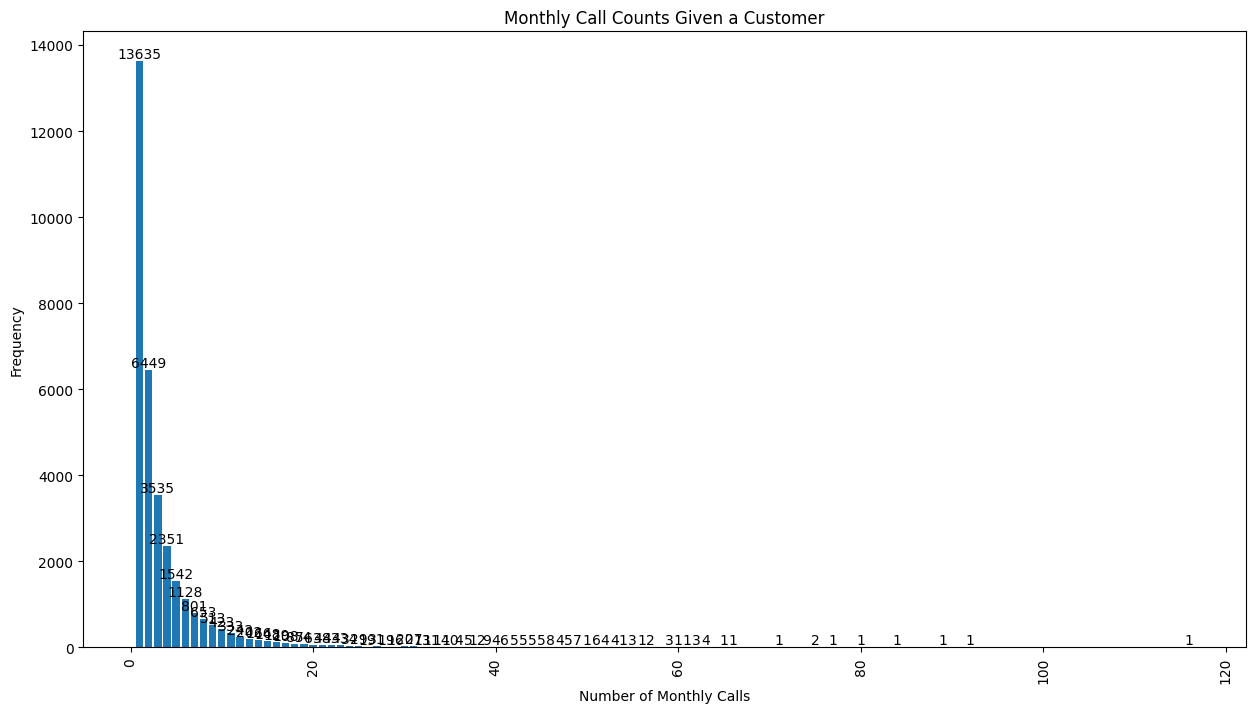

In [13]:
call_counts = calls_count['Call_Count'].value_counts()
x = call_counts.values
y = call_counts.index


plt.figure(figsize=(15, 8))
plt.bar(y, x, width=0.8)
plt.xlabel('Number of Monthly Calls')
plt.ylabel('Frequency')
plt.title('Monthly Call Counts Given a Customer')
for i in range(len(x)):
    plt.text(y[i], x[i], str(x[i]), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

In [15]:
calls_count['CALL_MON_YEAR'] = pd.to_datetime(calls_count['CALL_MON_YEAR'], format='%Y-%m').dt.to_period('M')

In [16]:
# Sort the DataFrame by 'CALL_MON_YEAR' in ascending order
calls_count.sort_values('CALL_MON_YEAR', inplace=True)

# Group the data by 'Customer_ID' and calculate the cumulative sum of 'Call_Count'
calls_count['CALLS_CUMULATIVE'] = calls_count.groupby('Customer_ID')['Call_Count'].cumsum()

# Create a new column 'CALLS_3_MONTHS' and calculate the sum of calls in the previous 3 months
calls_count['CALLS_3_MONTHS'] = calls_count.groupby('Customer_ID')['CALLS_CUMULATIVE'].diff(periods=3).fillna(calls_count['CALLS_CUMULATIVE'])

# Subtract the current month's call count from 'CALLS_3_MONTHS'
calls_count['CALLS_3_MONTHS'] -= calls_count['Call_Count']

calls_count.loc[calls_count.groupby('Customer_ID')['CALLS_CUMULATIVE'].transform('count') < 3, 'CALLS_3_MONTHS'] = calls_count['CALLS_CUMULATIVE']

calls_count 

,Customer_ID,CALL_MON_YEAR,Call_Count,CALLS_CUMULATIVE,CALLS_3_MONTHS
1035,1187747,2018-01,1,1,1.0
19746,50558417,2018-01,2,2,0.0
8360,8045537,2018-01,3,3,3.0
29567,88422027,2018-01,7,7,0.0
20432,53430817,2018-01,8,8,0.0
...,...,...,...,...,...
20197,52445227,2023-05,1,4,3.0
20194,52444947,2023-05,8,17,9.0
20164,52235357,2023-05,1,1,1.0
19938,51327267,2023-05,24,59,22.0


In [17]:
df['CALL_MON_YEAR'] = pd.to_datetime(df['CALL_MON_YEAR'], format='%Y-%m').dt.to_period('M')
df = df.merge(calls_count.loc[:,['Customer_ID', 'CALL_MON_YEAR', 'CALLS_3_MONTHS']], on=['Customer_ID','CALL_MON_YEAR'], how='left')
df

,Customer_ID,BOOK_DT,FICO,ORIGINAL_LOAN_AMOUNT,TOT_MO_PMT,TERM,NEW_USED_CD,LTV,COSGN_FLG,MDL_YR,...,RATIO_SIX,YR1_RESL_VLUE,YR2_RESL_VLUE,YR3_RESL_VLUE,YR4_RESL_VLUE,YR5_RESL_VLUE,YR6_RESL_VLUE,outcome,CALL_MON_YEAR,CALLS_3_MONTHS
0,47509157,2021-09-01,617,34271.97,742.21,72,0,1.06,0,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,1,2023-02,1.0
1,35919987,2021-03-29,684,30046.00,540.13,72,0,1.23,1,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,0,2023-05,8.0
2,35919987,2021-03-29,684,30046.00,540.13,72,0,1.23,1,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,0,2023-05,8.0
3,35919987,2021-03-29,684,30046.00,540.13,72,0,1.23,1,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,0,2023-05,8.0
4,35919987,2021-03-29,684,30046.00,540.13,72,0,1.23,1,2017,...,0.109856,35711.0,31250.0,29218.0,27800.0,25928.0,23061.0,0,2023-05,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,7198922,2019-03-05,632,15720.40,316.55,72,0,1.20,0,2017,...,0.034838,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,1,2023-01,0.0
118722,7198922,2019-03-05,632,15720.40,316.55,72,0,1.20,0,2017,...,0.034838,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,1,2023-01,0.0
118723,7877595,2021-02-03,751,17747.71,360.02,60,0,1.35,0,2017,...,NaN,31250.0,27800.0,25922.0,23456.0,20405.0,19947.0,1,2021-04,1.0
118724,7989148,2021-07-23,636,13894.91,252.52,72,0,0.74,0,2019,...,0.163551,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-05,2.0


In [18]:
df.sort_values(by=['Customer_ID', 'CALL_START_DATE'], inplace=True)
df['CALL_CURRENT_MON'] = df.groupby(['Customer_ID', 'CALL_MON_YEAR']).cumcount() + 1
df.loc[:, ['Customer_ID', 'CALL_START_DATE', 'outcome', 'CALL_CURRENT_MON']]

,Customer_ID,CALL_START_DATE,outcome,CALL_CURRENT_MON
100791,7350,2023-05-11 15:03:46,0,1
113570,8328,2023-01-24 15:34:29,0,1
113569,8328,2023-01-27 14:49:59,0,2
113568,8328,2023-01-28 10:39:56,0,3
113567,8328,2023-01-28 10:41:35,0,4
...,...,...,...,...
13951,99992127,2023-03-01 11:58:11,1,1
13639,99992127,2023-04-26 12:00:47,1,1
1073,99995487,2022-05-16 12:03:06,0,1
876,99995487,2022-05-16 12:03:53,0,2


In [19]:
df['CALLS_3_MONTHS'].value_counts()

0.0     16217
2.0     11869
1.0     10616
3.0      9982
4.0      8476
        ...  
88.0       10
61.0        8
93.0        5
68.0        4
94.0        2
Name: CALLS_3_MONTHS, Length: 84, dtype: int64

## feature importance

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118726 entries, 0 to 118725
Data columns (total 86 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       118726 non-null  int64         
 1   BOOK_DT                           118726 non-null  datetime64[ns]
 2   FICO                              118726 non-null  int64         
 3   ORIGINAL_LOAN_AMOUNT              118726 non-null  float64       
 4   TOT_MO_PMT                        118726 non-null  float64       
 5   TERM                              118726 non-null  int64         
 6   NEW_USED_CD                       118726 non-null  int64         
 7   LTV                               118726 non-null  float64       
 8   COSGN_FLG                         118726 non-null  int64         
 9   MDL_YR                            118726 non-null  int64         
 10  COBUYER_CUSTOM_CREDIT_SCORE     

- need to transform outcome so that only the last call of a month for a customer has outcome 1, meaning after the last call of that month, the customer repays the loan

In [71]:
import pandas as pd

grouped = df.groupby(['Customer_ID', 'CALL_MON_YEAR'])

def transform_outcome(group):
    if group['outcome'].any():  # If any of the rows for this group has outcome = 1
        group['outcome'] = 0  # Set all rows to 0
        group['outcome'].iloc[-1] = 1  # Set the last row to 1
    return group

df = grouped.apply(transform_outcome)
df.reset_index(drop=True, inplace=True)
df

,Customer_ID,BOOK_DT,FICO,ORIGINAL_LOAN_AMOUNT,TOT_MO_PMT,TERM,NEW_USED_CD,LTV,COSGN_FLG,MDL_YR,...,YR1_RESL_VLUE,YR2_RESL_VLUE,YR3_RESL_VLUE,YR4_RESL_VLUE,YR5_RESL_VLUE,YR6_RESL_VLUE,outcome,CALL_MON_YEAR,CALLS_3_MONTHS,CALL_CURRENT_MON
0,7350,2021-07-20,775,18754.55,293.78,72,0,0.76,0,2018,...,31250.0,27800.0,25922.0,23456.0,20405.0,19947.0,0,2023-05,1.0,1
1,8328,2020-03-18,613,27926.90,599.49,72,0,0.98,1,2017,...,54600.0,50750.0,47700.0,43856.0,40285.0,37611.0,0,2023-01,0.0,1
2,8328,2020-03-18,613,27926.90,599.49,72,0,0.98,1,2017,...,54600.0,50750.0,47700.0,43856.0,40285.0,37611.0,0,2023-01,0.0,2
3,8328,2020-03-18,613,27926.90,599.49,72,0,0.98,1,2017,...,54600.0,50750.0,47700.0,43856.0,40285.0,37611.0,0,2023-01,0.0,3
4,8328,2020-03-18,613,27926.90,599.49,72,0,0.98,1,2017,...,54600.0,50750.0,47700.0,43856.0,40285.0,37611.0,0,2023-01,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,99992127,2022-09-19,745,34320.99,555.58,75,1,1.19,0,2022,...,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,1,2023-03,1.0,1
118722,99992127,2022-09-19,745,34320.99,555.58,75,1,1.19,0,2022,...,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,1,2023-04,2.0,1
118723,99995487,2021-01-05,739,34908.85,484.84,72,1,1.27,0,2020,...,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,0,2022-05,3.0,1
118724,99995487,2021-01-05,739,34908.85,484.84,72,1,1.27,0,2020,...,22800.0,20783.0,18984.0,16424.0,15833.0,14428.0,0,2022-05,3.0,2


In [124]:
df['outcome'].value_counts()

0    95042
1    23684
Name: outcome, dtype: int64

In [72]:
df_select = df.copy()
df_select.drop(columns=['BOOK_DT', "CALL_START_DATE", "CALL_MON_YEAR", "Customer_ID"], inplace = True)

<AxesSubplot: >

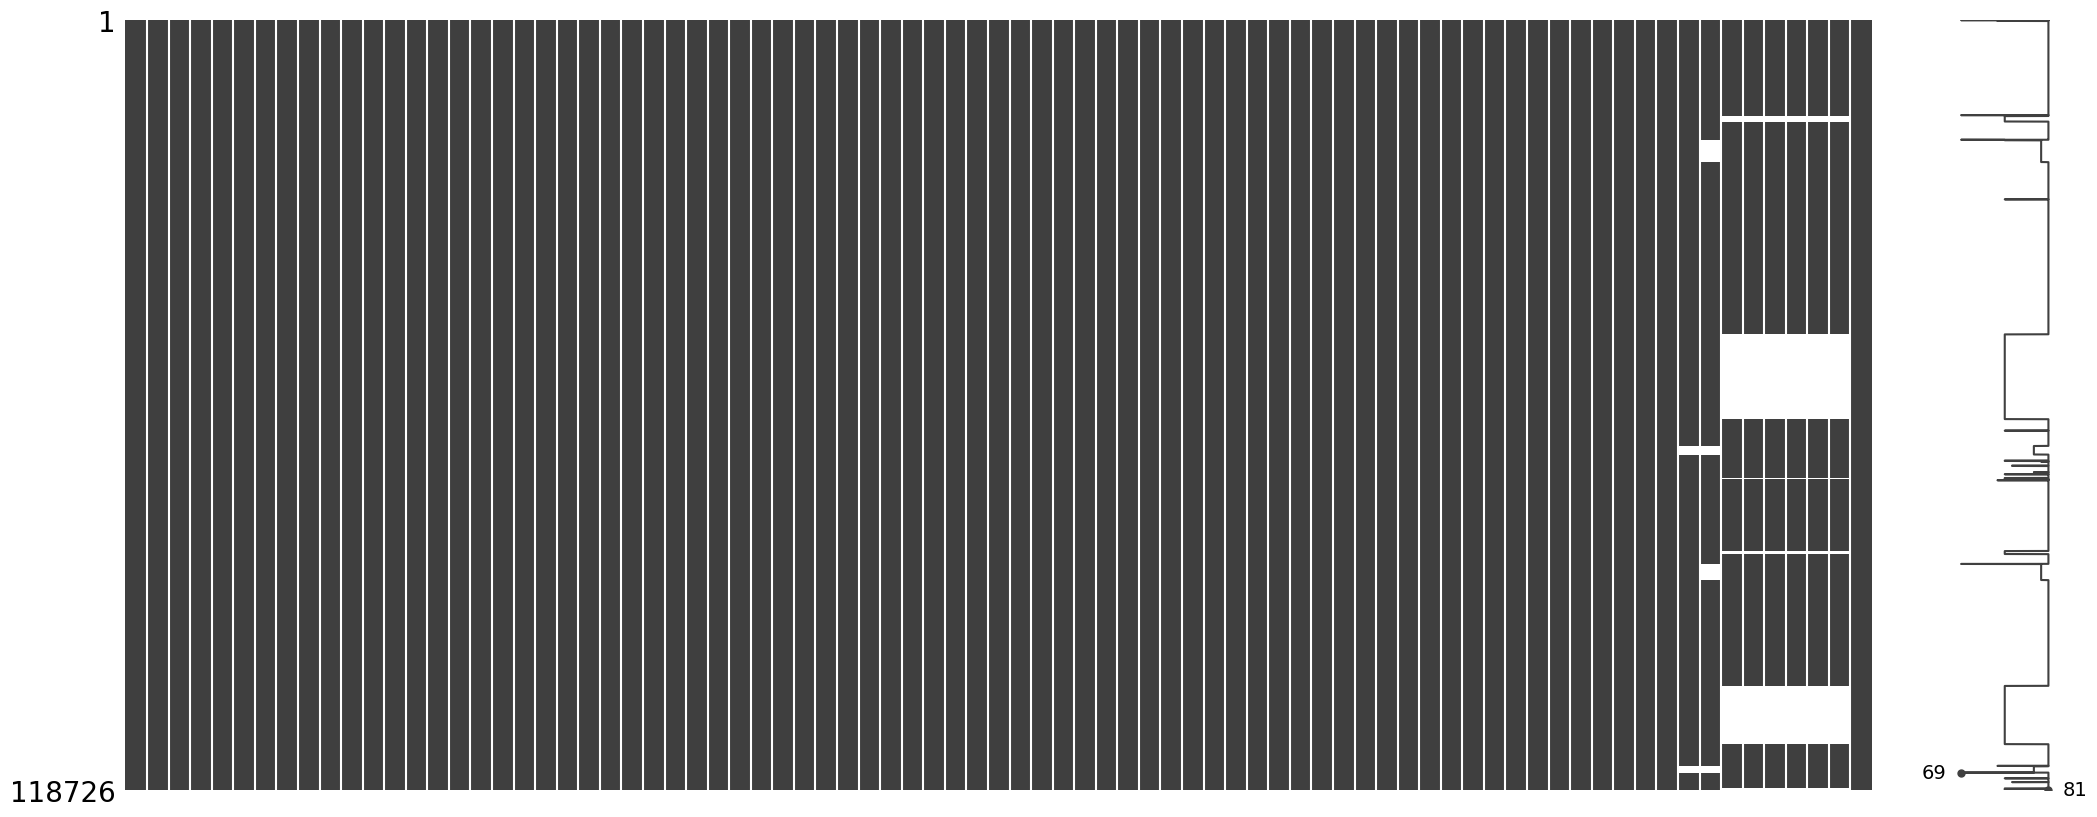

In [41]:
import missingno as msno
msno.matrix(df_select)

In [73]:
percentage_null = df_select.isnull().mean().sort_values(ascending=False).reset_index()
percentage_null.columns = ['variable', 'null percentage']
display(percentage_null)

,variable,null percentage
0,YR1_RESL_VLUE,0.2025
1,YR6_RESL_VLUE,0.2025
2,YR5_RESL_VLUE,0.2025
3,YR4_RESL_VLUE,0.2025
4,YR3_RESL_VLUE,0.2025
...,...,...
78,DEPARTMENT_STORE_MONTHLY_PAYMENT,0.0000
79,CURRENT_EMPLOYMENT_DURATION_NUMB,0.0000
80,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,0.0000
81,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,0.0000


In [74]:
filtered_variables = percentage_null[percentage_null['null percentage'] == 0]['variable']
df_select = df_select[filtered_variables]
df_select

,REVOLVING_TRADE_LINE_PERCENT,TOTAL_MONTHLY_PAYMENT_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,TOTAL_REPOSSESSION_COUNT,TOTAL_BANKRUPTCY_COUNT,REVOLVING_TRADE_LINE_COUNT,FICO,REVOLVING_SATISFACTORY_ACCOUNT_C,REVOLVING_CREDIT_MONTHLY_PAYMENT,REVOLVING_CREDIT_HIGH_AMOUNT,...,INSTALLMENT_TRADE_COUNT,HIGHEST_LOAN_AMOUNT,FINANCE_COMPANY_TRADE_LINE_COUNT,EVER_TRADE_PERCENT,DEPARTMENT_STORE_TRADE_COUNT,DEPARTMENT_STORE_MONTHLY_PAYMENT,CURRENT_EMPLOYMENT_DURATION_NUMB,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,CALL_CURRENT_MON
0,100,310,17,0,0,1,775,1,0,2000,...,0,2000,0,0.0,0,0,3,0,0,1
1,0,1972,0,0,0,0,613,0,28,0,...,1,16887,0,0.0,0,0,1,1,0,1
2,0,1972,0,0,0,0,613,0,28,0,...,1,16887,0,0.0,0,0,1,1,0,2
3,0,1972,0,0,0,0,613,0,28,0,...,1,16887,0,0.0,0,0,1,1,0,3
4,0,1972,0,0,0,0,613,0,28,0,...,1,16887,0,0.0,0,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,57,612,70,0,0,4,745,4,0,8700,...,3,7200,1,0.0,1,0,5,0,0,1
118722,57,612,70,0,0,4,745,4,0,8700,...,3,7200,1,0.0,1,0,5,0,0,1
118723,70,3751,817,0,0,28,739,24,55,77330,...,12,385000,0,0.0,8,55,20,1,0,1
118724,70,3751,817,0,0,28,739,24,55,77330,...,12,385000,0,0.0,8,55,20,1,0,2


In [75]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.1
selector = VarianceThreshold(threshold=threshold)
selector.fit(df_select)

# Get the boolean mask of selected features
selected_features = selector.get_support()
selected_features

# Get the indices of selected features
selected_indices = np.where(selected_features)[0]

# Subset your feature matrix with the selected features
df_select = df_select.iloc[:, selected_indices]
df_select

,REVOLVING_TRADE_LINE_PERCENT,TOTAL_MONTHLY_PAYMENT_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,REVOLVING_TRADE_LINE_COUNT,FICO,REVOLVING_SATISFACTORY_ACCOUNT_C,REVOLVING_CREDIT_MONTHLY_PAYMENT,REVOLVING_CREDIT_HIGH_AMOUNT,TRADE_LINES_RATED_COUNT,REVOLVING_CREDIT_BALANCE_AMOUNT,...,INQUIRY_COUNT,INSTALLMENT_TRADE_COUNT,HIGHEST_LOAN_AMOUNT,FINANCE_COMPANY_TRADE_LINE_COUNT,DEPARTMENT_STORE_TRADE_COUNT,DEPARTMENT_STORE_MONTHLY_PAYMENT,CURRENT_EMPLOYMENT_DURATION_NUMB,CURRENT_AUTOMOBILE_ACCOUNTS_COUN,CREDIT_REPORT_ACCOUNT_DISPUTE_CO,CALL_CURRENT_MON
0,100,310,17,1,775,1,0,2000,1,17,...,2,0,2000,0,0,0,3,0,0,1
1,0,1972,0,0,613,0,28,0,1,0,...,4,1,16887,0,0,0,1,1,0,1
2,0,1972,0,0,613,0,28,0,1,0,...,4,1,16887,0,0,0,1,1,0,2
3,0,1972,0,0,613,0,28,0,1,0,...,4,1,16887,0,0,0,1,1,0,3
4,0,1972,0,0,613,0,28,0,1,0,...,4,1,16887,0,0,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,57,612,70,4,745,4,0,8700,7,1394,...,3,3,7200,1,1,0,5,0,0,1
118722,57,612,70,4,745,4,0,8700,7,1394,...,3,3,7200,1,1,0,5,0,0,1
118723,70,3751,817,28,739,24,55,77330,39,13720,...,5,12,385000,0,8,55,20,1,0,1
118724,70,3751,817,28,739,24,55,77330,39,13720,...,5,12,385000,0,8,55,20,1,0,2


In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

target_variable = 'outcome'

features = df_select.drop(columns=[target_variable])
target = df_select[target_variable]

# Create a StandardScaler object
scaler = StandardScaler()

# Standard scale the features
scaled_features = scaler.fit_transform(features)

# Create a RandomForestClassifier with the scaled features
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(scaled_features, target)
importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 30 features
top_30_features = feature_importance_df.head(30)['Feature'].tolist()

# Print the top 30 features
print(top_30_features)


['CALL_CURRENT_MON', 'CALLS_3_MONTHS', 'CALL_DPD', 'DLNQNT_30_59_CNT', 'DLNQNT_10_29_CNT', 'DLNQNT_60_89_CNT', 'ORIGINAL_COMBINED_DEBT_TO_INCOME', 'BUYER_CUSTOM_CREDIT_SCORE', 'TOTAL_MONTHLY_PAYMENT_AMOUNT', 'DISPOSABLE_INCOME_AMOUNT', 'ORIGINAL_COMBINED_PAYMENT_TO_INC', 'HIGHEST_LOAN_AMOUNT', 'TOT_MO_PMT', 'UNPAID_CASH_BALANCE_AMOUNT', 'ORIGINAL_LOAN_AMOUNT', 'FICO', 'TOTAL_INCOME_AMOUNT', 'BUYER_CREDIT_SCORE', 'APPLICANT_AGE', 'RESIDENCE_DURATION_NUMBER', 'MONTHLY_BALANCE_TOTAL_AMOUNT', 'TOTAL_BUREAU_PAYMENT_AMOUNT', 'REVOLVING_CREDIT_BALANCE_AMOUNT', 'REVOLVING_CREDIT_HIGH_AMOUNT', 'NEWEST_TRADE_DATE_AGE', 'INQUIRY_COUNT', 'CURRENT_EMPLOYMENT_DURATION_NUMB', 'TRADE_LINES_RATED_COUNT', 'TRADE_LINE_COUNT', 'REVOLVING_CREDIT_MONTHLY_PAYMENT']


In [79]:
top15_cols = ['Customer_ID', 'CALL_MON_YEAR', 'CALL_START_DATE'] + feature_importance_df.head(15)['Feature'].tolist() + ["DLNQNT_90_CNT", 'outcome']
df_select_15 = df[top15_cols]
df_select_15

,Customer_ID,CALL_MON_YEAR,CALL_START_DATE,CALL_CURRENT_MON,CALLS_3_MONTHS,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,HIGHEST_LOAN_AMOUNT,TOT_MO_PMT,UNPAID_CASH_BALANCE_AMOUNT,ORIGINAL_LOAN_AMOUNT,DLNQNT_90_CNT,outcome
0,7350,2023-05,2023-05-11 15:03:46,1,1.0,35,1,1,0,6.21,779,310,4689.67,5.87,2000,293.78,14464.55,18754.55,0,0
1,8328,2023-01,2023-01-24 15:34:29,1,0.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0
2,8328,2023-01,2023-01-27 14:49:59,2,0.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0
3,8328,2023-01,2023-01-28 10:39:56,3,0.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0
4,8328,2023-01,2023-01-28 10:41:35,4,0.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,99992127,2023-03,2023-03-01 11:58:11,1,1.0,10,0,0,0,12.23,708,612,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1
118722,99992127,2023-04,2023-04-26 12:00:47,1,2.0,10,0,0,0,12.23,708,612,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1
118723,99995487,2022-05,2022-05-16 12:03:06,1,3.0,8,0,5,0,50.01,750,3751,3748.96,7.12,385000,484.84,30459.00,34908.85,0,0
118724,99995487,2022-05,2022-05-16 12:03:53,2,3.0,8,0,5,0,50.01,750,3751,3748.96,7.12,385000,484.84,30459.00,34908.85,0,0


In [54]:
correlation_matrix = df_select_15.drop(['Customer_ID', 'CALL_MON_YEAR'], axis=1).corr()
feature_correlation_threshold = 0.90  

feature_correlations = correlation_matrix.unstack().sort_values(ascending=False)
feature_correlations = feature_correlations[feature_correlations != 1.0]  # Exclude self-correlations

print("All feature correlations:")
for idx, correlation in feature_correlations.items():
    feature1, feature2 = idx
    print(f"({feature1}) - ({feature2}): {correlation}")

print("--------------------------------------------------")

# Filter highly correlated features
highly_correlated_features = feature_correlations[abs(feature_correlations) > feature_correlation_threshold].index.tolist()

print("Highly correlated features to consider removing:")
print(highly_correlated_features)

All feature correlations:
(DLNQNT_30_59_CNT) - (DLNQNT_10_29_CNT): 0.8384492648353388
(DLNQNT_10_29_CNT) - (DLNQNT_30_59_CNT): 0.8384492648353388
(DLNQNT_30_59_CNT) - (DLNQNT_60_89_CNT): 0.7551680314842845
(DLNQNT_60_89_CNT) - (DLNQNT_30_59_CNT): 0.7551680314842845
(BUYER_CREDIT_SCORE) - (FICO): 0.6163527735612613
(FICO) - (BUYER_CREDIT_SCORE): 0.6163527735612613
(DLNQNT_60_89_CNT) - (DLNQNT_10_29_CNT): 0.5575167374859531
(DLNQNT_10_29_CNT) - (DLNQNT_60_89_CNT): 0.5575167374859531
(BUYER_CUSTOM_CREDIT_SCORE) - (BUYER_CREDIT_SCORE): 0.5287978519684828
(BUYER_CREDIT_SCORE) - (BUYER_CUSTOM_CREDIT_SCORE): 0.5287978519684828
(ORIGINAL_COMBINED_PAYMENT_TO_INC) - (ORIGINAL_COMBINED_DEBT_TO_INCOME): 0.4718677085751786
(ORIGINAL_COMBINED_DEBT_TO_INCOME) - (ORIGINAL_COMBINED_PAYMENT_TO_INC): 0.4718677085751786
(ORIGINAL_COMBINED_DEBT_TO_INCOME) - (TOTAL_MONTHLY_PAYMENT_AMOUNT): 0.4340741591606201
(TOTAL_MONTHLY_PAYMENT_AMOUNT) - (ORIGINAL_COMBINED_DEBT_TO_INCOME): 0.4340741591606201
(TOTAL_MONTH

In [53]:
df_select_15 = df_select_15.drop(['ORIGINAL_LOAN_AMOUNT'], axis=1)

KeyError: "['ORIGINAL_LOAN_AMOUNT'] not found in axis"

In [30]:
# new_column_order = ['Customer_ID', 'CALL_START_DATE'] + df_select_15.columns.tolist()

# df_select_15 = df[new_column_order]
# df_select_15

,Customer_ID,CALL_START_DATE,CALLS_3_MONTHS,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_60_89_CNT,DLNQNT_10_29_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,DISPOSABLE_INCOME_AMOUNT,BUYER_CUSTOM_CREDIT_SCORE,HIGHEST_LOAN_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,TOTAL_MONTHLY_PAYMENT_AMOUNT,TOT_MO_PMT,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CREDIT_SCORE
0,7350,2023-05-11 15:03:46,1.0,35,1,0,1,6.21,4689.67,779,2000,5.87,310,293.78,14464.55,775
1,8328,2023-01-31 14:55:47,0.0,69,13,7,16,46.43,4706.35,599,16887,6.02,1972,599.49,27926.90,613
2,8328,2023-01-28 10:41:35,0.0,69,13,7,16,46.43,4706.35,599,16887,6.02,1972,599.49,27926.90,613
3,8328,2023-01-28 10:39:56,0.0,69,13,7,16,46.43,4706.35,599,16887,6.02,1972,599.49,27926.90,613
4,8328,2023-01-27 14:49:59,0.0,69,13,7,16,46.43,4706.35,599,16887,6.02,1972,599.49,27926.90,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,99992127,2023-03-01 11:58:11,1.0,10,0,0,0,12.23,4388.30,708,7200,10.83,612,555.58,33521.00,745
118722,99992127,2023-04-26 12:00:47,2.0,10,0,0,0,12.23,4388.30,708,7200,10.83,612,555.58,33521.00,745
118723,99995487,2022-05-17 10:51:52,3.0,8,0,0,5,50.01,3748.96,750,385000,7.12,3751,484.84,30459.00,739
118724,99995487,2022-05-16 12:03:53,3.0,8,0,0,5,50.01,3748.96,750,385000,7.12,3751,484.84,30459.00,739


In [221]:
top25_cols = ['Customer_ID', 'CALL_MON_YEAR', 'CALL_START_DATE'] + feature_importance_df.head(25)['Feature'].tolist() + ["DLNQNT_90_CNT", 'outcome']
df_select_25 = df[top25_cols]
df_select_25 = df_select_25.drop(['ORIGINAL_LOAN_AMOUNT'], axis=1)
df_select_25

,Customer_ID,CALL_MON_YEAR,CALL_START_DATE,CALL_CURRENT_MON,CALLS_3_MONTHS,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,...,BUYER_CREDIT_SCORE,APPLICANT_AGE,RESIDENCE_DURATION_NUMBER,MONTHLY_BALANCE_TOTAL_AMOUNT,TOTAL_BUREAU_PAYMENT_AMOUNT,REVOLVING_CREDIT_BALANCE_AMOUNT,REVOLVING_CREDIT_HIGH_AMOUNT,NEWEST_TRADE_DATE_AGE,DLNQNT_90_CNT,outcome
0,7350,2023-05,2023-05-11 15:03:46,1,1.0,35,1,1,0,6.21,...,775,50,77,17,17,17,2000,39,0,0
1,8328,2023-01,2023-01-24 15:34:29,1,0.0,69,13,16,7,46.43,...,613,37,12,0,0,0,0,34,0,0
2,8328,2023-01,2023-01-27 14:49:59,2,0.0,69,13,16,7,46.43,...,613,37,12,0,0,0,0,34,0,0
3,8328,2023-01,2023-01-28 10:39:56,3,0.0,69,13,16,7,46.43,...,613,37,12,0,0,0,0,34,0,0
4,8328,2023-01,2023-01-28 10:41:35,4,0.0,69,13,16,7,46.43,...,613,37,12,0,0,0,0,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,99992127,2023-03,2023-03-01 11:58:11,1,1.0,10,0,0,0,12.23,...,745,70,120,70,70,1394,8700,10,0,1
118722,99992127,2023-04,2023-04-26 12:00:47,1,2.0,10,0,0,0,12.23,...,745,70,120,70,70,1394,8700,10,0,1
118723,99995487,2022-05,2022-05-16 12:03:06,1,3.0,8,0,5,0,50.01,...,739,54,48,817,817,13720,77330,4,0,0
118724,99995487,2022-05,2022-05-16 12:03:53,2,3.0,8,0,5,0,50.01,...,739,54,48,817,817,13720,77330,4,0,0


## regression problem dataset preparing

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118726 entries, 0 to 118725
Data columns (total 87 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       118726 non-null  int64         
 1   BOOK_DT                           118726 non-null  datetime64[ns]
 2   FICO                              118726 non-null  int64         
 3   ORIGINAL_LOAN_AMOUNT              118726 non-null  float64       
 4   TOT_MO_PMT                        118726 non-null  float64       
 5   TERM                              118726 non-null  int64         
 6   NEW_USED_CD                       118726 non-null  int64         
 7   LTV                               118726 non-null  float64       
 8   COSGN_FLG                         118726 non-null  int64         
 9   MDL_YR                            118726 non-null  int64         
 10  COBUYER_CUSTOM_CREDIT_SCORE     

In [178]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [93]:
select_cols = ['Customer_ID', 'CALL_MON_YEAR', 'CALL_START_DATE'] + feature_importance_df.head(15)['Feature'].tolist() + ["DLNQNT_90_CNT", 'outcome']
df_reduced_temp = df[select_cols]
df_reduced_temp[df_reduced_temp['Customer_ID'] == 8328]

,Customer_ID,CALL_MON_YEAR,CALL_START_DATE,CALL_CURRENT_MON,CALLS_3_MONTHS,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,HIGHEST_LOAN_AMOUNT,TOT_MO_PMT,UNPAID_CASH_BALANCE_AMOUNT,ORIGINAL_LOAN_AMOUNT,DLNQNT_90_CNT,outcome
1,8328,2023-01,2023-01-24 15:34:29,1,0.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.9,27926.9,0,0
2,8328,2023-01,2023-01-27 14:49:59,2,0.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.9,27926.9,0,0
3,8328,2023-01,2023-01-28 10:39:56,3,0.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.9,27926.9,0,0
4,8328,2023-01,2023-01-28 10:41:35,4,0.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.9,27926.9,0,0
5,8328,2023-01,2023-01-31 14:55:47,5,0.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.9,27926.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,8328,2023-04,2023-04-20 11:37:08,26,32.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.9,27926.9,0,0
64,8328,2023-04,2023-04-20 11:37:56,27,32.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.9,27926.9,0,0
65,8328,2023-04,2023-04-20 11:40:22,28,32.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.9,27926.9,0,0
66,8328,2023-04,2023-04-20 11:41:46,29,32.0,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.9,27926.9,0,0


In [95]:
df_reduced_temp = df_reduced_temp.drop(['CALL_CURRENT_MON'], axis=1)

In [96]:
df_reduced_temp = df_reduced_temp.sort_values(by=['Customer_ID', 'CALL_START_DATE'])
df_reduced = df_reduced_temp.groupby(['Customer_ID', 'CALL_MON_YEAR']).last().reset_index()

df_reduced['CALLS_CURRENT_MONTH'] = df_reduced_temp.groupby(['Customer_ID', 'CALL_MON_YEAR'])['Customer_ID'].transform(lambda x: x.count())
df_reduced['PREVIOUS_MONTH_CALLS'] = df_reduced.groupby('Customer_ID')['CALLS_CURRENT_MONTH'].shift()

df_reduced

,Customer_ID,CALL_MON_YEAR,CALL_START_DATE,CALLS_3_MONTHS,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,BUYER_CUSTOM_CREDIT_SCORE,...,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,HIGHEST_LOAN_AMOUNT,TOT_MO_PMT,UNPAID_CASH_BALANCE_AMOUNT,ORIGINAL_LOAN_AMOUNT,DLNQNT_90_CNT,outcome,CALLS_CURRENT_MONTH,PREVIOUS_MONTH_CALLS
0,7350,2023-05,2023-05-11 15:03:46,1.0,35,1,1,0,6.21,779,...,4689.67,5.87,2000,293.78,14464.55,18754.55,0,0,1,NaN
1,8328,2023-01,2023-01-31 14:55:47,0.0,69,13,16,7,46.43,599,...,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,NaN
2,8328,2023-02,2023-02-28 14:37:49,5.0,69,13,16,7,46.43,599,...,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
3,8328,2023-03,2023-03-29 11:19:14,10.0,69,13,16,7,46.43,599,...,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
4,8328,2023-04,2023-04-20 11:46:45,32.0,69,13,16,7,46.43,599,...,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,99987007,2023-02,2023-02-21 12:31:02,4.0,21,15,19,5,24.74,686,...,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,NaN
33082,99987007,2023-03,2023-03-17 13:57:01,7.0,21,15,19,5,24.74,686,...,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,15.0
33083,99992127,2023-03,2023-03-01 11:58:11,1.0,10,0,0,0,12.23,708,...,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,NaN
33084,99992127,2023-04,2023-04-26 12:00:47,2.0,10,0,0,0,12.23,708,...,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,6.0


In [37]:
df_reduced.drop(['CALL_START_DATE'], axis=1)[df_reduced['Customer_ID'] == 8328]

,Customer_ID,CALL_MON_YEAR,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,HIGHEST_LOAN_AMOUNT,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,ORIGINAL_COMBINED_DEBT_TO_INCOME,APPLICANT_AGE,BUYER_CUSTOM_CREDIT_SCORE,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CREDIT_SCORE,TOT_MO_PMT,DLNQNT_90_CNT,outcome,PREVIOUS_MONTH_CALLS
1,8328,2023-01,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.9,613,599.49,0,-1,0.0
2,8328,2023-02,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.9,613,599.49,0,-1,8.0
3,8328,2023-03,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.9,613,599.49,0,-1,8.0
4,8328,2023-04,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.9,613,599.49,0,-1,8.0


In [38]:
df_reduced.columns

Index(['Customer_ID', 'CALL_MON_YEAR', 'CALL_START_DATE', 'CALL_DPD',
       'DLNQNT_10_29_CNT', 'DLNQNT_60_89_CNT', 'DLNQNT_30_59_CNT',
       'HIGHEST_LOAN_AMOUNT', 'TOTAL_MONTHLY_PAYMENT_AMOUNT',
       'DISPOSABLE_INCOME_AMOUNT', 'ORIGINAL_COMBINED_PAYMENT_TO_INC',
       'ORIGINAL_COMBINED_DEBT_TO_INCOME', 'APPLICANT_AGE',
       'BUYER_CUSTOM_CREDIT_SCORE', 'UNPAID_CASH_BALANCE_AMOUNT',
       'BUYER_CREDIT_SCORE', 'TOT_MO_PMT', 'DLNQNT_90_CNT', 'outcome',
       'PREVIOUS_MONTH_CALLS'],
      dtype='object')

In [97]:
df_reduced['outcome'].value_counts()

1    23684
0     9402
Name: outcome, dtype: int64

In [98]:
# df_reduced['outcome'] = df_reduced.apply(lambda row: row['CALLS_CURRENT_MONTH'] if row['outcome'] == 1 else -1, axis=1)
# df_reduced.drop('CALLS_CURRENT_MONTH', axis=1, inplace=True)
df_reduced['PREVIOUS_MONTH_CALLS'] = df_reduced['PREVIOUS_MONTH_CALLS'].fillna(0)
df_reduced

,Customer_ID,CALL_MON_YEAR,CALL_START_DATE,CALLS_3_MONTHS,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,BUYER_CUSTOM_CREDIT_SCORE,...,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,HIGHEST_LOAN_AMOUNT,TOT_MO_PMT,UNPAID_CASH_BALANCE_AMOUNT,ORIGINAL_LOAN_AMOUNT,DLNQNT_90_CNT,outcome,CALLS_CURRENT_MONTH,PREVIOUS_MONTH_CALLS
0,7350,2023-05,2023-05-11 15:03:46,1.0,35,1,1,0,6.21,779,...,4689.67,5.87,2000,293.78,14464.55,18754.55,0,0,1,0.0
1,8328,2023-01,2023-01-31 14:55:47,0.0,69,13,16,7,46.43,599,...,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,0.0
2,8328,2023-02,2023-02-28 14:37:49,5.0,69,13,16,7,46.43,599,...,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
3,8328,2023-03,2023-03-29 11:19:14,10.0,69,13,16,7,46.43,599,...,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
4,8328,2023-04,2023-04-20 11:46:45,32.0,69,13,16,7,46.43,599,...,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,99987007,2023-02,2023-02-21 12:31:02,4.0,21,15,19,5,24.74,686,...,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,0.0
33082,99987007,2023-03,2023-03-17 13:57:01,7.0,21,15,19,5,24.74,686,...,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,15.0
33083,99992127,2023-03,2023-03-01 11:58:11,1.0,10,0,0,0,12.23,708,...,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,0.0
33084,99992127,2023-04,2023-04-26 12:00:47,2.0,10,0,0,0,12.23,708,...,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,6.0


In [38]:
import pickle

file_path = './data/df_reduced.pkl'

# export dataframes
with open(file_path, 'wb') as f:
    pickle.dump(df_reduced, f)

In [20]:
df_reduced = pd.read_pickle('./data/df_reduced.pkl')

In [4]:
df_reduced_model = df_reduced.drop(['Customer_ID', 'CALL_MON_YEAR', 'CALL_START_DATE'], axis=1)
df_reduced_model

,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,HIGHEST_LOAN_AMOUNT,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,ORIGINAL_COMBINED_DEBT_TO_INCOME,APPLICANT_AGE,BUYER_CUSTOM_CREDIT_SCORE,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CREDIT_SCORE,TOT_MO_PMT,DLNQNT_90_CNT,outcome,PREVIOUS_MONTH_CALLS
0,35,1,0,1,2000,310,4689.67,5.87,6.21,50,779,14464.55,775,293.78,0,-1,0.0
1,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,-1,0.0
2,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,-1,8.0
3,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,-1,8.0
4,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,-1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,-1,0.0
33082,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,-1,5.0
33083,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,5,0.0
33084,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,5,5.0


In [21]:
paid_df = df_reduced[df_reduced['outcome'] >= 0]
np.median(paid_df['outcome'])

4.0

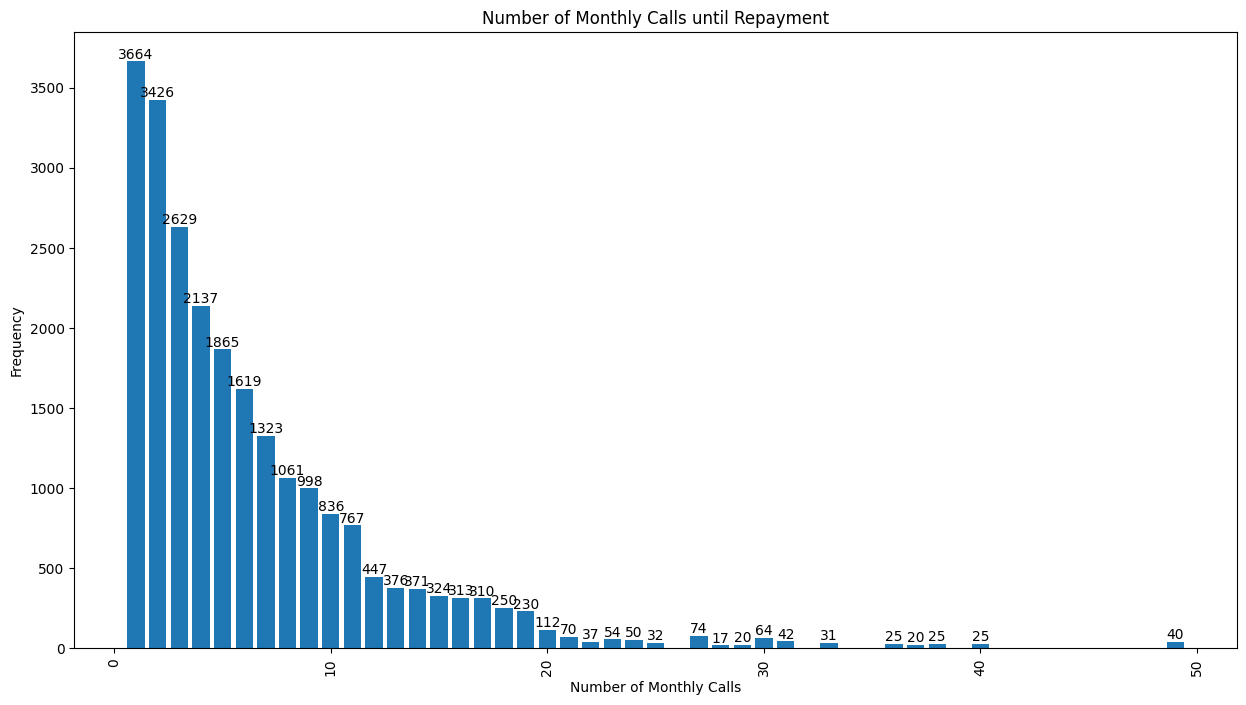

In [86]:
paid_counts = paid_df['outcome'].value_counts()
x = paid_counts.values
y = paid_counts.index


plt.figure(figsize=(15, 8))
plt.bar(y, x, width=0.8)
plt.xlabel('Number of Monthly Calls')
plt.ylabel('Frequency')
plt.title('Number of Monthly Calls until Repayment')
for i in range(len(x)):
    plt.text(y[i], x[i], str(x[i]), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

In [5]:
df_reduced_bi = df_reduced_model.copy()
df_reduced_bi['outcome'] = df_reduced_bi['outcome'].apply(lambda x: 1 if x >= 0 else 0)

# Model

## Bidirectional

In [138]:
from sklearn.model_selection import train_test_split

df_select_15['ID_MONTH'] = df_select_15['Customer_ID'].astype(str) + df_select_15['CALL_MON_YEAR'].astype(str)

train_ids, test_ids = train_test_split(df_select_15['ID_MONTH'].unique(), test_size=0.2, random_state=42)

train_df = df_select_15[df_select_15['ID_MONTH'].isin(train_ids)]
test_df = df_select_15[df_select_15['ID_MONTH'].isin(test_ids)]

train_df = train_df.drop(columns='ID_MONTH')
test_df = test_df.drop(columns='ID_MONTH')

In [139]:
from sklearn.preprocessing import StandardScaler

train_df = train_df.drop(columns=['Customer_ID', 'CALL_MON_YEAR'])
test_df = test_df.drop(columns=['Customer_ID', 'CALL_MON_YEAR'])

X_train = train_df.drop(columns='outcome')
y_train = train_df['outcome']

X_test = test_df.drop(columns='outcome')
y_test = test_df['outcome']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [141]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional

# Build the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, X_train.shape[2])))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

y_pred_proba = model.predict(X_test)

Epoch 1/50
2972/2972 [==============================] - 14s 3ms/step - loss: 0.3457 - accuracy: 0.8485 - val_loss: 0.3232 - val_accuracy: 0.8562
Epoch 2/50
2972/2972 [==============================] - 9s 3ms/step - loss: 0.3235 - accuracy: 0.8587 - val_loss: 0.3191 - val_accuracy: 0.8585
Epoch 3/50
2972/2972 [==============================] - 9s 3ms/step - loss: 0.3201 - accuracy: 0.8603 - val_loss: 0.3200 - val_accuracy: 0.8586
Epoch 4/50
2972/2972 [==============================] - 9s 3ms/step - loss: 0.3181 - accuracy: 0.8615 - val_loss: 0.3142 - val_accuracy: 0.8653
Epoch 5/50
2972/2972 [==============================] - 10s 3ms/step - loss: 0.3170 - accuracy: 0.8612 - val_loss: 0.3122 - val_accuracy: 0.8648
Epoch 6/50
2972/2972 [==============================] - 10s 3ms/step - loss: 0.3156 - accuracy: 0.8632 - val_loss: 0.3160 - val_accuracy: 0.8639
Epoch 7/50
2972/2972 [==============================] - 10s 3ms/step - loss: 0.3148 - accuracy: 0.8630 - val_loss: 0.3146 - val_accur

NameError: name 'roc_auc_score' is not defined

In [142]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_proba)  # Assuming binary classification, use the positive class probabilities
print("AUC:", auc)

AUC: 0.8970387842464564


In [160]:
from sklearn.model_selection import train_test_split

df_select_25['ID_MONTH'] = df_select_25['Customer_ID'].astype(str) + df_select_25['CALL_MON_YEAR'].astype(str)

train_ids, test_ids = train_test_split(df_select_25['ID_MONTH'].unique(), test_size=0.2, random_state=42)

train_df = df_select_25[df_select_25['ID_MONTH'].isin(train_ids)]
test_df = df_select_25[df_select_25['ID_MONTH'].isin(test_ids)]

train_df = train_df.drop(columns='ID_MONTH')
test_df = test_df.drop(columns='ID_MONTH')

In [161]:
from sklearn.preprocessing import StandardScaler

train_df = train_df.drop(columns=['Customer_ID', 'CALL_MON_YEAR'])
test_df = test_df.drop(columns=['Customer_ID', 'CALL_MON_YEAR'])

X_train = train_df.drop(columns='outcome')
y_train = train_df['outcome']

X_test = test_df.drop(columns='outcome')
y_test = test_df['outcome']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [163]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau


model = Sequential()
model.add(Bidirectional(LSTM(8, return_sequences=True), input_shape=(1, X_train.shape[2])))
model.add(Bidirectional(LSTM(4)))
model.add(Dense(1, activation='sigmoid'))


# Compile the model with a high initial learning rate
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=5, verbose=1)

# Train the model with the learning rate scheduler callback
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

y_pred_proba = model.predict(X_test)

auc = roc_auc_score(y_test, y_pred_proba)  # Assuming binary classification, use the positive class probabilities
print("AUC:", auc)

Epoch 1/50
5943/5943 [==============================] - 23s 3ms/step - loss: 0.3624 - accuracy: 0.8384 - val_loss: 0.3282 - val_accuracy: 0.8540 - lr: 0.0010
Epoch 2/50
5943/5943 [==============================] - 22s 4ms/step - loss: 0.3234 - accuracy: 0.8583 - val_loss: 0.3202 - val_accuracy: 0.8595 - lr: 0.0010
Epoch 3/50
5943/5943 [==============================] - 25s 4ms/step - loss: 0.3204 - accuracy: 0.8598 - val_loss: 0.3161 - val_accuracy: 0.8626 - lr: 0.0010
Epoch 4/50
5943/5943 [==============================] - 24s 4ms/step - loss: 0.3182 - accuracy: 0.8622 - val_loss: 0.3204 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 5/50
5943/5943 [==============================] - 26s 4ms/step - loss: 0.3167 - accuracy: 0.8631 - val_loss: 0.3163 - val_accuracy: 0.8633 - lr: 0.0010
Epoch 6/50
5943/5943 [==============================] - 25s 4ms/step - loss: 0.3158 - accuracy: 0.8632 - val_loss: 0.3135 - val_accuracy: 0.8653 - lr: 0.0010
Epoch 7/50
5943/5943 [==============================

In [143]:
df_select_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118726 entries, 0 to 118725
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype    
---  ------                            --------------   -----    
 0   Customer_ID                       118726 non-null  int64    
 1   CALL_MON_YEAR                     118726 non-null  period[M]
 2   CALL_CURRENT_MON                  118726 non-null  int64    
 3   CALLS_3_MONTHS                    118726 non-null  float64  
 4   CALL_DPD                          118726 non-null  int64    
 5   DLNQNT_10_29_CNT                  118726 non-null  int64    
 6   DLNQNT_60_89_CNT                  118726 non-null  int64    
 7   DLNQNT_30_59_CNT                  118726 non-null  int64    
 8   ORIGINAL_COMBINED_DEBT_TO_INCOME  118726 non-null  float64  
 9   UNPAID_CASH_BALANCE_AMOUNT        118726 non-null  float64  
 10  TOT_MO_PMT                        118726 non-null  float64  
 11  BUYER_CUSTOM_CREDIT_SCORE 

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118726 entries, 0 to 118725
Data columns (total 87 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       118726 non-null  int64         
 1   BOOK_DT                           118726 non-null  datetime64[ns]
 2   FICO                              118726 non-null  int64         
 3   ORIGINAL_LOAN_AMOUNT              118726 non-null  float64       
 4   TOT_MO_PMT                        118726 non-null  float64       
 5   TERM                              118726 non-null  int64         
 6   NEW_USED_CD                       118726 non-null  int64         
 7   LTV                               118726 non-null  float64       
 8   COSGN_FLG                         118726 non-null  int64         
 9   MDL_YR                            118726 non-null  int64         
 10  COBUYER_CUSTOM_CREDIT_SCORE     

In [154]:
df_select_15[(df_select_15['Customer_ID'] == 99992127)]

,Customer_ID,CALL_MON_YEAR,CALL_CURRENT_MON,CALLS_3_MONTHS,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,UNPAID_CASH_BALANCE_AMOUNT,TOT_MO_PMT,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,DISPOSABLE_INCOME_AMOUNT,HIGHEST_LOAN_AMOUNT,outcome,ID_MONTH
118721,99992127,2023-03,1,1.0,10,0,0,0,12.23,33521.0,555.58,708,612,10.83,4388.3,7200,1,999921272023-03
118722,99992127,2023-04,1,2.0,10,0,0,0,12.23,33521.0,555.58,708,612,10.83,4388.3,7200,1,999921272023-04


In [153]:
df_select_15

,Customer_ID,CALL_MON_YEAR,CALL_CURRENT_MON,CALLS_3_MONTHS,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,UNPAID_CASH_BALANCE_AMOUNT,TOT_MO_PMT,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,DISPOSABLE_INCOME_AMOUNT,HIGHEST_LOAN_AMOUNT,outcome,ID_MONTH
0,7350,2023-05,1,1.0,35,1,0,1,6.21,14464.55,293.78,779,310,5.87,4689.67,2000,0,73502023-05
1,8328,2023-01,1,0.0,69,16,7,13,46.43,27926.90,599.49,599,1972,6.02,4706.35,16887,0,83282023-01
2,8328,2023-01,2,0.0,69,16,7,13,46.43,27926.90,599.49,599,1972,6.02,4706.35,16887,0,83282023-01
3,8328,2023-01,3,0.0,69,16,7,13,46.43,27926.90,599.49,599,1972,6.02,4706.35,16887,0,83282023-01
4,8328,2023-01,4,0.0,69,16,7,13,46.43,27926.90,599.49,599,1972,6.02,4706.35,16887,0,83282023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118721,99992127,2023-03,1,1.0,10,0,0,0,12.23,33521.00,555.58,708,612,10.83,4388.30,7200,1,999921272023-03
118722,99992127,2023-04,1,2.0,10,0,0,0,12.23,33521.00,555.58,708,612,10.83,4388.30,7200,1,999921272023-04
118723,99995487,2022-05,1,3.0,8,5,0,0,50.01,30459.00,484.84,750,3751,7.12,3748.96,385000,0,999954872022-05
118724,99995487,2022-05,2,3.0,8,5,0,0,50.01,30459.00,484.84,750,3751,7.12,3748.96,385000,0,999954872022-05


## Feed forward NN for regression

In [198]:
df_reduced_model = pd.read_pickle('data\df_reduced_model.pkl')

In [210]:
df_reduced_model['outcome'] = df_reduced_model['outcome'].replace(-1, 0)

In [184]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Split your data into X (features) and Y (target)
X = df_reduced_model.drop('outcome', axis=1)
Y = df_reduced_model['outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create model, required for KerasRegressor
def create_model(learning_rate=0.01, optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='linear'))

    if optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create model
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
learning_rate = [0.01]
optimizer = ['SGD', 'RMSprop', 'Adam']
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(model__learning_rate=learning_rate, model__optimizer=optimizer, model__activation=activation)

# Grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 


c:\Users\rheah\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best: 0.062555 using {'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__optimizer': 'SGD'}
0.062555 (0.008511) with: {'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__optimizer': 'SGD'}
0.056066 (0.018824) with: {'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__optimizer': 'RMSprop'}
0.055794 (0.002814) with: {'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__optimizer': 'Adam'}
0.045481 (0.002494) with: {'model__activation': 'tanh', 'model__learning_rate': 0.01, 'model__optimizer': 'SGD'}
0.044416 (0.002449) with: {'model__activation': 'tanh', 'model__learning_rate': 0.01, 'model__optimizer': 'RMSprop'}
0.045593 (0.006136) with: {'model__activation': 'tanh', 'model__learning_rate': 0.01, 'model__optimizer': 'Adam'}
0.032750 (0.003367) with: {'model__activation': 'sigmoid', 'model__learning_rate': 0.01, 'model__optimizer': 'SGD'}
0.032660 (0.004478) with: {'model__activation': 'sigmoid', 'model__learning_rate': 0.01,

Epoch 1/50
2647/2647 - 2s - loss: 32.4928 - 2s/epoch - 934us/step
Epoch 2/50
2647/2647 - 2s - loss: 31.7240 - 2s/epoch - 737us/step
Epoch 3/50
2647/2647 - 2s - loss: 31.6418 - 2s/epoch - 743us/step
Epoch 4/50
2647/2647 - 2s - loss: 31.7381 - 2s/epoch - 712us/step
Epoch 5/50
2647/2647 - 2s - loss: 31.5026 - 2s/epoch - 709us/step
Epoch 6/50
2647/2647 - 2s - loss: 31.4419 - 2s/epoch - 750us/step
Epoch 7/50
2647/2647 - 2s - loss: 31.3709 - 2s/epoch - 727us/step
Epoch 8/50
2647/2647 - 2s - loss: 31.3584 - 2s/epoch - 733us/step
Epoch 9/50
2647/2647 - 2s - loss: 31.3007 - 2s/epoch - 747us/step
Epoch 10/50
2647/2647 - 2s - loss: 31.2934 - 2s/epoch - 761us/step
Epoch 11/50
2647/2647 - 2s - loss: 31.2543 - 2s/epoch - 738us/step
Epoch 12/50
2647/2647 - 2s - loss: 31.1161 - 2s/epoch - 850us/step
Epoch 13/50
2647/2647 - 2s - loss: 31.1732 - 2s/epoch - 851us/step
Epoch 14/50
2647/2647 - 2s - loss: 31.1636 - 2s/epoch - 811us/step
Epoch 15/50
2647/2647 - 2s - loss: 31.1721 - 2s/epoch - 777us/step
Epoc

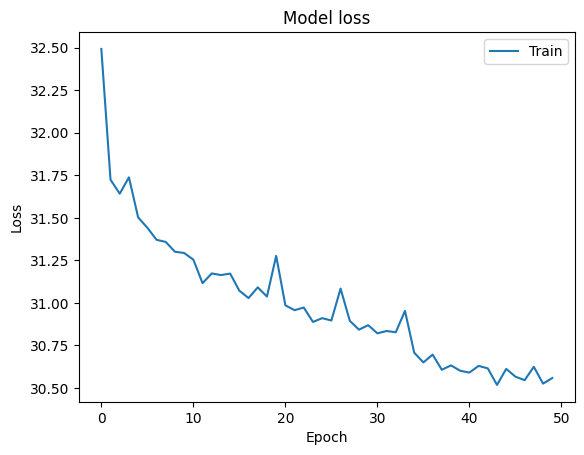

In [173]:
# Retrieve the best parameters
best_params = grid_result.best_params_

# Create final model with best parameters
final_model = create_model(learning_rate=best_params['model__learning_rate'], 
                           optimizer=best_params['model__optimizer'],
                           activation=best_params['model__activation'])

# Fit the model with the training data
history = final_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2)

# You can now evaluate the model on test data or use it to make predictions
test_loss = final_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


In [180]:
y_pred_continuous = final_model.predict(X_test)
y_pred = np.round(y_pred_continuous)
y_pred

207/207 [==============================] - 0s 815us/step


array([[3.],
       [3.],
       [5.],
       ...,
       [3.],
       [3.],
       [5.]], dtype=float32)

In [178]:
y_pred

array([[3.],
       [3.],
       [5.],
       ...,
       [3.],
       [3.],
       [5.]], dtype=float32)

In [181]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

3.895889996977939

In [214]:
y_pred_flattened = y_pred_all.flatten()  # or y_pred_all.ravel()
y_pred_series = pd.Series(y_pred_flattened)

In [215]:
y_pred_series = y_pred_series.clip(lower=0)

In [216]:
mae_all = mean_absolute_error(Y, y_pred_series)
print("Mean Absolute Error on All Data:", mae_all)

Mean Absolute Error on All Data: 3.872997642507405


In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_pred_all = final_model.predict(X_scaled)

y_pred_all = np.round(y_pred_all)

y_pred_flattened = y_pred_all.flatten()  # or y_pred_all.ravel()
y_pred_series = pd.Series(y_pred_flattened)
y_pred_series = y_pred_series.clip(lower=0)

mae_all = mean_absolute_error(Y, y_pred_series)
print("Mean Absolute Error on All Data:", mae_all)

1034/1034 [==============================] - 1s 720us/step
Mean Absolute Error on All Data: 3.8736021277881885


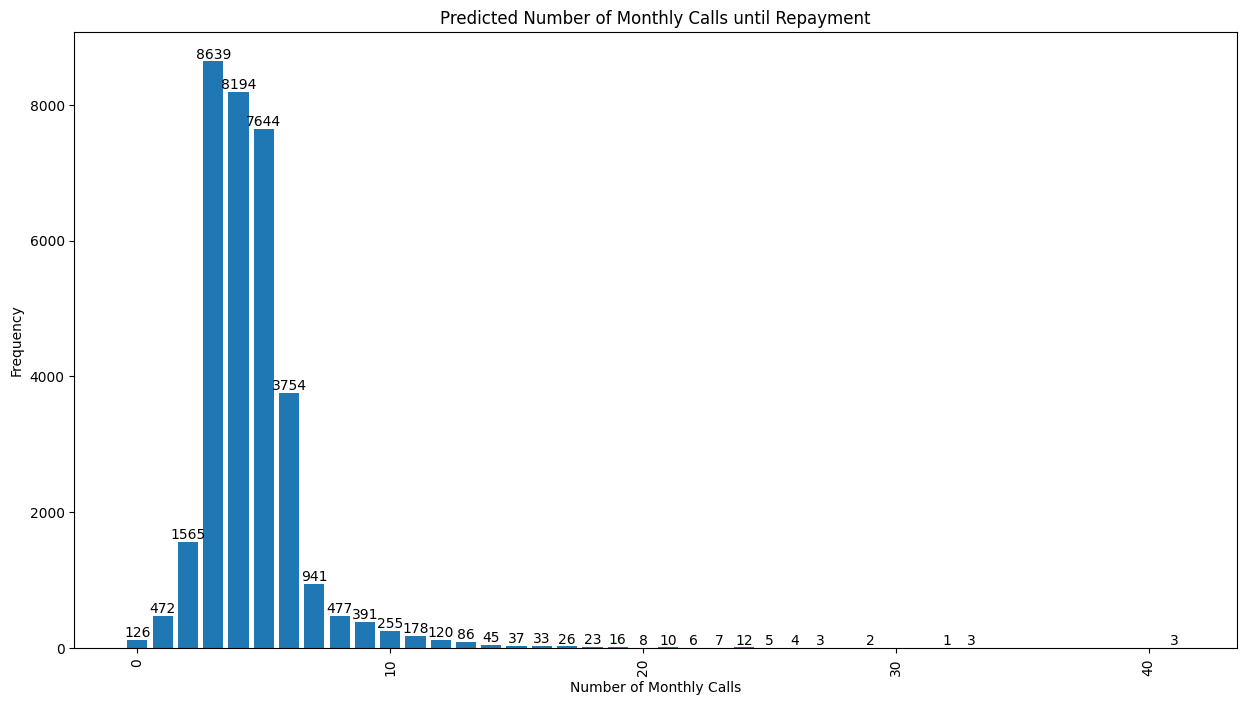

In [208]:
paid_counts = y_pred_series.value_counts()
x = paid_counts.values
y = paid_counts.index


plt.figure(figsize=(15, 8))
plt.bar(y, x, width=0.8)
plt.xlabel('Number of Monthly Calls')
plt.ylabel('Frequency')
plt.title('Predicted Number of Monthly Calls until Repayment')
for i in range(len(x)):
    plt.text(y[i], x[i], str(x[i]), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

In [211]:
df_reduced_model['outcome_predicted'] = y_pred_series
df_reduced_model.loc[:, ['outcome', 'outcome_predicted']]

,outcome,outcome_predicted
0,0,3.0
1,0,3.0
2,0,3.0
3,0,3.0
4,0,3.0
...,...,...
33081,0,3.0
33082,0,3.0
33083,5,5.0
33084,5,5.0


In [217]:
import pandas as pd

def calculate_saved_days(row):
    if row['outcome_predicted'] == 0:
        return row['outcome']
    elif row['outcome_predicted'] < row['outcome']:
        return row['outcome'] - row['outcome_predicted']
    else:
        return 0

# Apply the custom function to calculate saved days for each row
saved_days = df_reduced_model.apply(calculate_saved_days, axis=1)

# Calculate the average saved days
average_saved_days = saved_days.mean()

print("Average Saved Days:", average_saved_days)


Average Saved Days: 1.9533337363235206


In [199]:
df_paid = df_reduced_model[df_reduced_model['outcome'] != 0]
X_paid = df_paid.drop('outcome', axis=1)
Y_paid = df_paid['outcome']  
X_paid = scaler.fit_transform(X_paid)

y_pred_paid = final_model.predict(X_paid)

# Round the predictions if necessary (you can remove this if you're doing classification)
y_pred_paid = np.round(y_pred_paid)

# Calculate the mean absolute error on all of the data
mean_absolute_error(Y_paid, y_pred_paid)

1034/1034 [==============================] - 1s 689us/step


4.157528864172157

## bidirectional for reduced dataset

In [223]:
df_reduced_model

,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,HIGHEST_LOAN_AMOUNT,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,ORIGINAL_COMBINED_DEBT_TO_INCOME,APPLICANT_AGE,BUYER_CUSTOM_CREDIT_SCORE,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CREDIT_SCORE,TOT_MO_PMT,DLNQNT_90_CNT,outcome,PREVIOUS_MONTH_CALLS,outcome_predicted
0,35,1,0,1,2000,310,4689.67,5.87,6.21,50,779,14464.55,775,293.78,0,0,0.0,3.0
1,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,0.0,3.0
2,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,8.0,3.0
3,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,8.0,3.0
4,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,0,0.0,3.0
33082,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,0,5.0,3.0
33083,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,5,0.0,5.0
33084,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,5,5.0,5.0


In [222]:
df_reduced_bi

,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,HIGHEST_LOAN_AMOUNT,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,ORIGINAL_COMBINED_DEBT_TO_INCOME,APPLICANT_AGE,BUYER_CUSTOM_CREDIT_SCORE,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CREDIT_SCORE,TOT_MO_PMT,DLNQNT_90_CNT,outcome,PREVIOUS_MONTH_CALLS
0,35,1,0,1,2000,310,4689.67,5.87,6.21,50,779,14464.55,775,293.78,0,0,0.0
1,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,0.0
2,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,8.0
3,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,8.0
4,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,0,0.0
33082,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,0,5.0
33083,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,1,0.0
33084,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,1,5.0


In [229]:
df_reduced.loc[:, ['Customer_ID', 'CALL_MON_YEAR']]

,Customer_ID,CALL_MON_YEAR
0,7350,2023-05
1,8328,2023-01
2,8328,2023-02
3,8328,2023-03
4,8328,2023-04
...,...,...
33081,99987007,2023-02
33082,99987007,2023-03
33083,99992127,2023-03
33084,99992127,2023-04


In [226]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
X = df_reduced_bi.drop('outcome', axis=1)
Y = df_reduced_bi['outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [227]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [231]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.optimizers import Adam

def create_model(hp):
    # Create model
    model = Sequential()
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), 
                                return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))

    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(LSTM(units=hp.Int('units_'+str(i), min_value=32, max_value=256, step=32), 
                                    return_sequences=(i<(hp.Int('n_layers', 1, 4)-1)))))
        model.add(Dropout(rate=hp.Float('dropout_'+str(i+2), min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = Adam(learning_rate=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model


# Create a tuner
tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=10,  # how many model configurations would you like to test?
    executions_per_trial=1,  # how many trials per variation? (same model could perform differently)
    directory='my_dir',
    project_name='helloworld')

tuner.search_space_summary()

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

INFO:tensorflow:Reloading Tuner from my_dir\helloworld\tuner0.json
Search space summary
Default search space size: 8
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_final (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.01, 0.1], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 3

In [235]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Now, you can fit this model on your data
history =model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

y_pred = model.predict(X_test)

The optimal number of units in the first densely-connected layer is 32 and the optimal learning rate for the optimizer is 0.01.
Epoch 1/100
828/828 [==============================] - 9s 5ms/step - loss: 0.5404 - accuracy: 0.7384 - val_loss: 0.5321 - val_accuracy: 0.7393
Epoch 2/100
828/828 [==============================] - 3s 4ms/step - loss: 0.5289 - accuracy: 0.7413 - val_loss: 0.5275 - val_accuracy: 0.7504
Epoch 3/100
828/828 [==============================] - 3s 4ms/step - loss: 0.5224 - accuracy: 0.7472 - val_loss: 0.5228 - val_accuracy: 0.7499
Epoch 4/100
828/828 [==============================] - 3s 4ms/step - loss: 0.5145 - accuracy: 0.7529 - val_loss: 0.5217 - val_accuracy: 0.7557
Epoch 5/100
828/828 [==============================] - 3s 4ms/step - loss: 0.5044 - accuracy: 0.7593 - val_loss: 0.5078 - val_accuracy: 0.7584
Epoch 6/100
828/828 [==============================] - 3s 4ms/step - loss: 0.4927 - accuracy: 0.7665 - val_loss: 0.5038 - val_accuracy: 0.7597
Epoch 7/100
82

In [236]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy: ", accuracy)

207/207 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.9015
Test Accuracy:  0.9014807939529419


In [238]:
X_scaled = scaler.fit_transform(X)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))
y_pred = model.predict(X_scaled)

1034/1034 [==============================] - 1s 1ms/step


Optimal Threshold: 0.6658791899681091


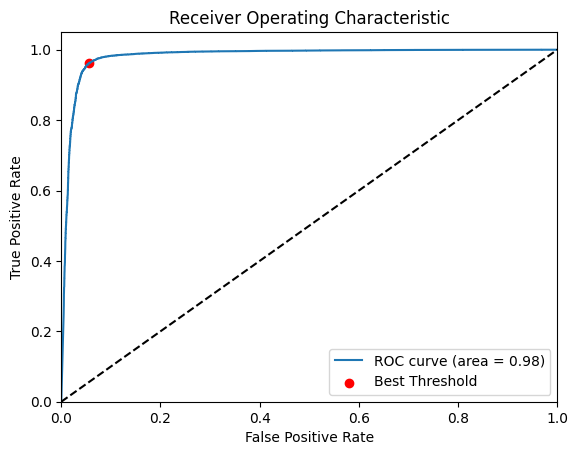

In [243]:
from sklearn.metrics import roc_curve, auc
import numpy as np

fpr, tpr, thresholds = roc_curve(df_reduced_bi['outcome'], y_pred)

roc_auc = auc(fpr, tpr)

# Get the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='r', label='Best Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [244]:
import numpy as np

y_pred_labels = np.where(y_pred >= 0.6658791899681091, 1, 0)

In [260]:
len(y_pred)

33086

In [248]:
df_reduced_bi['repay_predicted'] = y_pred_labels
df_reduced_bi

,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,HIGHEST_LOAN_AMOUNT,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,ORIGINAL_COMBINED_DEBT_TO_INCOME,APPLICANT_AGE,BUYER_CUSTOM_CREDIT_SCORE,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CREDIT_SCORE,TOT_MO_PMT,DLNQNT_90_CNT,outcome,PREVIOUS_MONTH_CALLS,repay_predicted
0,35,1,0,1,2000,310,4689.67,5.87,6.21,50,779,14464.55,775,293.78,0,0,0.0,0
1,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,0.0,0
2,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,8.0,0
3,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,8.0,0
4,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,0,0.0,0
33082,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,0,5.0,0
33083,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,1,0.0,1
33084,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,1,5.0,1


In [250]:
df_reduced_bi['repay_prob'] = y_pred

In [261]:
df_reduced['repay_prob'] = df_reduced_bi['repay_prob']
df_reduced

,Customer_ID,CALL_MON_YEAR,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,...,HIGHEST_LOAN_AMOUNT,TOT_MO_PMT,UNPAID_CASH_BALANCE_AMOUNT,ORIGINAL_LOAN_AMOUNT,DLNQNT_90_CNT,outcome,CALLS_CURRENT_MONTH,PREVIOUS_MONTH_CALLS,repay_predicted,repay_prob
0,7350,2023-05,35,1,1,0,6.21,779,310,4689.67,...,2000,293.78,14464.55,18754.55,0,0,1,0.0,0,0.000002
1,8328,2023-01,69,13,16,7,46.43,599,1972,4706.35,...,16887,599.49,27926.90,27926.90,0,0,5,0.0,0,0.000004
2,8328,2023-02,69,13,16,7,46.43,599,1972,4706.35,...,16887,599.49,27926.90,27926.90,0,0,5,5.0,0,0.000071
3,8328,2023-03,69,13,16,7,46.43,599,1972,4706.35,...,16887,599.49,27926.90,27926.90,0,0,5,5.0,0,0.000071
4,8328,2023-04,69,13,16,7,46.43,599,1972,4706.35,...,16887,599.49,27926.90,27926.90,0,0,5,5.0,0,0.000071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,99987007,2023-02,21,15,19,5,24.74,686,1243,1957.39,...,27514,621.68,29235.00,33736.00,1,0,15,0.0,0,0.001056
33082,99987007,2023-03,21,15,19,5,24.74,686,1243,1957.39,...,27514,621.68,29235.00,33736.00,1,0,15,15.0,0,0.002904
33083,99992127,2023-03,10,0,0,0,12.23,708,612,4388.30,...,7200,555.58,33521.00,34320.99,0,1,6,0.0,1,0.982726
33084,99992127,2023-04,10,0,0,0,12.23,708,612,4388.30,...,7200,555.58,33521.00,34320.99,0,1,6,6.0,1,0.997200


In [249]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_reduced_bi['outcome'], y_pred_labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9567188538959076


In [239]:
y_pred

array([[1.8379540e-06],
       [4.1382077e-06],
       [7.1271446e-05],
       ...,
       [9.8272574e-01],
       [9.9720025e-01],
       [4.6152458e-01]], dtype=float32)

In [251]:
indices = df_reduced_bi[df_reduced_bi['repay_predicted'] == 1].index
df_positive = df_reduced_model.loc[indices]
df_positive

,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,HIGHEST_LOAN_AMOUNT,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,ORIGINAL_COMBINED_DEBT_TO_INCOME,APPLICANT_AGE,BUYER_CUSTOM_CREDIT_SCORE,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CREDIT_SCORE,TOT_MO_PMT,DLNQNT_90_CNT,outcome,PREVIOUS_MONTH_CALLS,outcome_predicted
5,16,2,0,0,84900,1864,3836.11,8.19,32.70,48,726,29074.0,651,515.06,0,8,0.0,6.0
6,47,30,1,4,90333,2766,1433.65,15.79,65.87,34,644,37834.0,644,617.96,0,8,0.0,5.0
7,31,15,0,4,293744,2798,7201.85,4.93,37.41,51,677,43600.0,686,760.83,0,8,0.0,5.0
8,31,15,0,4,293744,2798,7201.85,4.93,37.41,51,677,43600.0,686,760.83,0,8,8.0,5.0
9,31,15,0,4,293744,2798,7201.85,4.93,37.41,51,677,43600.0,686,760.83,0,4,8.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33078,6,14,1,4,77500,1956,2910.31,6.06,20.23,72,759,35194.0,851,630.60,0,1,1.0,4.0
33079,5,2,0,0,161128,2585,2831.93,7.65,44.21,40,686,54334.0,666,678.99,0,1,0.0,8.0
33080,5,2,0,0,161128,2585,2831.93,7.65,44.21,40,686,54334.0,666,678.99,0,5,1.0,7.0
33083,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.0,745,555.58,0,5,0.0,5.0


In [252]:
df_positive['outcome'].value_counts()

1     3508
2     3292
3     2517
4     2060
5     1805
6     1563
7     1269
8     1034
9      959
10     811
11     738
0      525
12     435
13     363
14     356
15     309
16     304
17     292
18     240
19     222
20     106
27      69
21      67
30      62
23      50
24      48
31      42
49      40
22      37
25      28
33      27
38      25
40      24
36      24
29      19
37      17
28      15
Name: outcome, dtype: int64

In [253]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Split your data into X (features) and Y (target)
X = df_positive.drop(['outcome','outcome_predicted'], axis=1)
Y = df_positive['outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create model, required for KerasRegressor
def create_model(learning_rate=0.01, optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='linear'))

    if optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create model
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
learning_rate = [0.01]
optimizer = ['SGD', 'RMSprop', 'Adam']
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(model__learning_rate=learning_rate, model__optimizer=optimizer, model__activation=activation)

# Grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 

c:\Users\rheah\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best: 0.050071 using {'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__optimizer': 'Adam'}
0.048827 (0.007808) with: {'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__optimizer': 'SGD'}
0.048597 (0.001497) with: {'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__optimizer': 'RMSprop'}
0.050071 (0.016781) with: {'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__optimizer': 'Adam'}
0.015363 (0.009238) with: {'model__activation': 'tanh', 'model__learning_rate': 0.01, 'model__optimizer': 'SGD'}
0.018235 (0.004664) with: {'model__activation': 'tanh', 'model__learning_rate': 0.01, 'model__optimizer': 'RMSprop'}
0.030348 (0.007989) with: {'model__activation': 'tanh', 'model__learning_rate': 0.01, 'model__optimizer': 'Adam'}
0.007936 (0.004239) with: {'model__activation': 'sigmoid', 'model__learning_rate': 0.01, 'model__optimizer': 'SGD'}
0.013429 (0.010848) with: {'model__activation': 'sigmoid', 'model__learning_rate': 0.01

Epoch 1/50
1865/1865 - 2s - loss: 34.8943 - 2s/epoch - 910us/step
Epoch 2/50
1865/1865 - 2s - loss: 33.5396 - 2s/epoch - 823us/step
Epoch 3/50
1865/1865 - 1s - loss: 33.2609 - 1s/epoch - 750us/step
Epoch 4/50
1865/1865 - 1s - loss: 33.2751 - 1s/epoch - 762us/step
Epoch 5/50
1865/1865 - 1s - loss: 33.2687 - 1s/epoch - 725us/step
Epoch 6/50
1865/1865 - 1s - loss: 33.0480 - 1s/epoch - 663us/step
Epoch 7/50
1865/1865 - 1s - loss: 33.0778 - 1s/epoch - 764us/step
Epoch 8/50
1865/1865 - 1s - loss: 32.9981 - 1s/epoch - 706us/step
Epoch 9/50
1865/1865 - 1s - loss: 32.8757 - 1s/epoch - 674us/step
Epoch 10/50
1865/1865 - 1s - loss: 32.9497 - 1s/epoch - 753us/step
Epoch 11/50
1865/1865 - 2s - loss: 32.8114 - 2s/epoch - 804us/step
Epoch 12/50
1865/1865 - 1s - loss: 32.8032 - 1s/epoch - 796us/step
Epoch 13/50
1865/1865 - 2s - loss: 32.7438 - 2s/epoch - 841us/step
Epoch 14/50
1865/1865 - 1s - loss: 32.7510 - 1s/epoch - 742us/step
Epoch 15/50
1865/1865 - 1s - loss: 32.7375 - 1s/epoch - 786us/step
Epoc

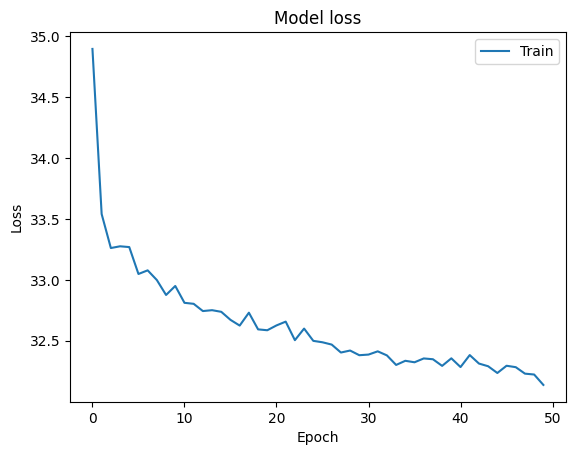

In [254]:
# Retrieve the best parameters
best_params = grid_result.best_params_

# Create final model with best parameters
final_model = create_model(learning_rate=best_params['model__learning_rate'], 
                           optimizer=best_params['model__optimizer'],
                           activation=best_params['model__activation'])

# Fit the model with the training data
history = final_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2)

# You can now evaluate the model on test data or use it to make predictions
test_loss = final_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [255]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_pred_all = final_model.predict(X_scaled)

y_pred_all = np.round(y_pred_all)

y_pred_flattened = y_pred_all.flatten()  # or y_pred_all.ravel()
y_pred_series = pd.Series(y_pred_flattened)
y_pred_series = y_pred_series.clip(lower=0)

mae_all = mean_absolute_error(Y, y_pred_series)
print("Mean Absolute Error on All Data:", mae_all)

729/729 [==============================] - 1s 632us/step
Mean Absolute Error on All Data: 4.001287443137928


## Survival Analysis

In [83]:
import pickle

file_path = './data/df_select_15.pkl'

# export dataframes
with open(file_path, 'wb') as f:
    pickle.dump(df_select_15, f)

### single survival problem 

In [118]:
df_reduced

,Customer_ID,CALL_MON_YEAR,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,HIGHEST_LOAN_AMOUNT,TOT_MO_PMT,UNPAID_CASH_BALANCE_AMOUNT,ORIGINAL_LOAN_AMOUNT,DLNQNT_90_CNT,outcome,CALLS_CURRENT_MONTH,PREVIOUS_MONTH_CALLS
0,7350,2023-05,35,1,1,0,6.21,779,310,4689.67,5.87,2000,293.78,14464.55,18754.55,0,0,1,0.0
1,8328,2023-01,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,0.0
2,8328,2023-02,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
3,8328,2023-03,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
4,8328,2023-04,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,99987007,2023-02,21,15,19,5,24.74,686,1243,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,0.0
33082,99987007,2023-03,21,15,19,5,24.74,686,1243,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,15.0
33083,99992127,2023-03,10,0,0,0,12.23,708,612,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,0.0
33084,99992127,2023-04,10,0,0,0,12.23,708,612,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,6.0


In [134]:
df_survival = df_reduced.copy()
df_survival = df_survival.drop(['Customer_ID', 'CALL_MON_YEAR'],axis=1)

In [135]:
df_survival

,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,HIGHEST_LOAN_AMOUNT,TOT_MO_PMT,UNPAID_CASH_BALANCE_AMOUNT,ORIGINAL_LOAN_AMOUNT,DLNQNT_90_CNT,outcome,CALLS_CURRENT_MONTH,PREVIOUS_MONTH_CALLS
0,35,1,1,0,6.21,779,310,4689.67,5.87,2000,293.78,14464.55,18754.55,0,0,1,0.0
1,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,0.0
2,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
3,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
4,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,21,15,19,5,24.74,686,1243,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,0.0
33082,21,15,19,5,24.74,686,1243,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,15.0
33083,10,0,0,0,12.23,708,612,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,0.0
33084,10,0,0,0,12.23,708,612,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,6.0


In [133]:
from sksurv.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sksurv.linear_model import CoxPHSurvivalAnalysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



# Load your data into a DataFrame named df
df_survival['outcome'] = df_survival['outcome'].astype(bool)

# Structure the data for scikit-survival
structured_arr = np.zeros(df_survival.shape[0], dtype={
    'names': ('outcome', 'CALLS_CURRENT_MONTH'),
    'formats': ('?', 'f8')
})

structured_arr['outcome'] = df_survival['outcome']
structured_arr['CALLS_CURRENT_MONTH'] = df_survival['CALLS_CURRENT_MONTH']


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_survival.drop('outcome', axis=1), structured_arr, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

cph = CoxPHSurvivalAnalysis()
cph.fit(X_train, y_train)


# Make predictions on the test set
survival_pred = cph.predict_survival_function(X_test)

# To evaluate the model, you could use concordance index
from sksurv.metrics import concordance_index_censored
concordance_index = concordance_index_censored(y_test['outcome'], y_test['CALLS_CURRENT_MONTH'], cph.predict(X_test))


c:\Users\rheah\AppData\Local\Programs\Python\Python310\lib\site-packages\sksurv\linear_model\coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
c:\Users\rheah\AppData\Local\Programs\Python\Python310\lib\site-packages\sksurv\linear_model\coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x / risk_set
c:\Users\rheah\AppData\Local\Programs\Python\Python310\lib\site-packages\sksurv\linear_model\coxph.py:241: RuntimeWarning: invalid value encountered in divide
  a = risk_set_xx / risk_set


ValueError: search direction contains NaN or infinite values

In [125]:
correlation_matrix = df_survival.drop(['outcome'], axis=1).corr()
feature_correlation_threshold = 0.80  

feature_correlations = correlation_matrix.unstack().sort_values(ascending=False)
feature_correlations = feature_correlations[feature_correlations != 1.0]  # Exclude self-correlations

print("All feature correlations:")
for idx, correlation in feature_correlations.items():
    feature1, feature2 = idx
    print(f"({feature1}) - ({feature2}): {correlation}")

print("--------------------------------------------------")

# Filter highly correlated features
highly_correlated_features = feature_correlations[abs(feature_correlations) > feature_correlation_threshold].index.tolist()

print("Highly correlated features to consider removing:")
print(highly_correlated_features)

All feature correlations:
(ORIGINAL_LOAN_AMOUNT) - (UNPAID_CASH_BALANCE_AMOUNT): 0.9832148001391827
(UNPAID_CASH_BALANCE_AMOUNT) - (ORIGINAL_LOAN_AMOUNT): 0.9832148001391827
(DLNQNT_30_59_CNT) - (DLNQNT_10_29_CNT): 0.8209771873977946
(DLNQNT_10_29_CNT) - (DLNQNT_30_59_CNT): 0.8209771873977946
(DLNQNT_30_59_CNT) - (DLNQNT_60_89_CNT): 0.744804808854795
(DLNQNT_60_89_CNT) - (DLNQNT_30_59_CNT): 0.744804808854795
(DLNQNT_90_CNT) - (CALL_DPD): 0.7382256071810707
(CALL_DPD) - (DLNQNT_90_CNT): 0.7382256071810707
(PREVIOUS_MONTH_CALLS) - (CALLS_CURRENT_MONTH): 0.614309512031199
(CALLS_CURRENT_MONTH) - (PREVIOUS_MONTH_CALLS): 0.614309512031199
(TOTAL_MONTHLY_PAYMENT_AMOUNT) - (ORIGINAL_COMBINED_DEBT_TO_INCOME): 0.5390326760087881
(ORIGINAL_COMBINED_DEBT_TO_INCOME) - (TOTAL_MONTHLY_PAYMENT_AMOUNT): 0.5390326760087881
(DLNQNT_10_29_CNT) - (DLNQNT_60_89_CNT): 0.5358048106541381
(DLNQNT_60_89_CNT) - (DLNQNT_10_29_CNT): 0.5358048106541381
(TOT_MO_PMT) - (UNPAID_CASH_BALANCE_AMOUNT): 0.473772998508189

### Survival stacking: casting survival analysis as a classification problem

In [100]:
df_reduced = df_reduced.drop(['CALL_START_DATE', 'CALLS_3_MONTHS'], axis=1)

In [101]:
df_reduced

,Customer_ID,CALL_MON_YEAR,CALL_DPD,DLNQNT_30_59_CNT,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,ORIGINAL_COMBINED_DEBT_TO_INCOME,BUYER_CUSTOM_CREDIT_SCORE,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,HIGHEST_LOAN_AMOUNT,TOT_MO_PMT,UNPAID_CASH_BALANCE_AMOUNT,ORIGINAL_LOAN_AMOUNT,DLNQNT_90_CNT,outcome,CALLS_CURRENT_MONTH,PREVIOUS_MONTH_CALLS
0,7350,2023-05,35,1,1,0,6.21,779,310,4689.67,5.87,2000,293.78,14464.55,18754.55,0,0,1,0.0
1,8328,2023-01,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,0.0
2,8328,2023-02,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
3,8328,2023-03,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
4,8328,2023-04,69,13,16,7,46.43,599,1972,4706.35,6.02,16887,599.49,27926.90,27926.90,0,0,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,99987007,2023-02,21,15,19,5,24.74,686,1243,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,0.0
33082,99987007,2023-03,21,15,19,5,24.74,686,1243,1957.39,7.52,27514,621.68,29235.00,33736.00,1,0,15,15.0
33083,99992127,2023-03,10,0,0,0,12.23,708,612,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,0.0
33084,99992127,2023-04,10,0,0,0,12.23,708,612,4388.30,10.83,7200,555.58,33521.00,34320.99,0,1,6,6.0


In [92]:
df_reduced_temp

NameError: name 'df_reduced_temp' is not defined

In [ ]:
survival_col = ['Customer_ID', 'CALL_MON_YEAR', 'CALL_START_DATE'] + feature_importance_df.head(15)['Feature'].tolist() + ["DLNQNT_90_CNT", 'outcome']
df_select_15 = df[top15_cols]
df_select_15

### binning classification

In [153]:
df_reduced_model = pd.read_pickle('data/df_reduced_model.pkl')

In [154]:
df_reduced_model

,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,HIGHEST_LOAN_AMOUNT,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,ORIGINAL_COMBINED_DEBT_TO_INCOME,APPLICANT_AGE,BUYER_CUSTOM_CREDIT_SCORE,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CREDIT_SCORE,TOT_MO_PMT,DLNQNT_90_CNT,outcome,PREVIOUS_MONTH_CALLS
0,35,1,0,1,2000,310,4689.67,5.87,6.21,50,779,14464.55,775,293.78,0,-1,0.0
1,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,-1,0.0
2,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,-1,8.0
3,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,-1,8.0
4,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,-1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,-1,0.0
33082,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,-1,5.0
33083,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,5,0.0
33084,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,5,5.0


In [155]:
df_reduced_model['outcome'].value_counts()

-1     9402
 1     3664
 2     3426
 3     2629
 4     2137
 5     1865
 6     1619
 7     1323
 8     1061
 9      998
 10     836
 11     767
 12     447
 13     376
 14     371
 15     324
 16     313
 17     310
 18     250
 19     230
 20     112
 27      74
 21      70
 30      64
 23      54
 24      50
 31      42
 49      40
 22      37
 25      32
 33      31
 40      25
 38      25
 36      25
 37      20
 29      20
 28      17
Name: outcome, dtype: int64

In [156]:
bins = [-2, 0, 2, 4, 7, 10, 15, 20, 30, np.inf]
names = [0, 1, 2, 3, 4, 5, 6, 7, 8]

df_reduced_model['Class'] = pd.cut(df_reduced_model['outcome'], bins, labels=names)

In [158]:
df_reduced_model = df_reduced_model.drop(['outcome'], axis=1)

In [159]:
df_reduced_model

,CALL_DPD,DLNQNT_10_29_CNT,DLNQNT_60_89_CNT,DLNQNT_30_59_CNT,HIGHEST_LOAN_AMOUNT,TOTAL_MONTHLY_PAYMENT_AMOUNT,DISPOSABLE_INCOME_AMOUNT,ORIGINAL_COMBINED_PAYMENT_TO_INC,ORIGINAL_COMBINED_DEBT_TO_INCOME,APPLICANT_AGE,BUYER_CUSTOM_CREDIT_SCORE,UNPAID_CASH_BALANCE_AMOUNT,BUYER_CREDIT_SCORE,TOT_MO_PMT,DLNQNT_90_CNT,PREVIOUS_MONTH_CALLS,Class
0,35,1,0,1,2000,310,4689.67,5.87,6.21,50,779,14464.55,775,293.78,0,0.0,0
1,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,0.0,0
2,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,8.0,0
3,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,8.0,0
4,69,16,7,13,16887,1972,4706.35,6.02,46.43,37,599,27926.90,613,599.49,0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33081,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,0.0,0
33082,21,19,5,15,27514,1243,1957.39,7.52,24.74,82,686,29235.00,756,621.68,1,5.0,0
33083,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,0.0,3
33084,10,0,0,0,7200,612,4388.30,10.83,12.23,70,708,33521.00,745,555.58,0,5.0,3


In [160]:
X = df_reduced_model.drop('Class', axis=1)
Y = df_reduced_model['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1894
           1       0.34      0.41      0.37      1407
           2       0.30      0.24      0.27       945
           3       0.33      0.28      0.30       991
           4       0.28      0.21      0.24       554
           5       0.31      0.22      0.26       460
           6       0.29      0.17      0.21       246
           7       0.44      0.22      0.30        85
           8       0.16      0.14      0.15        36

    accuracy                           0.47      6618
   macro avg       0.35      0.31      0.32      6618
weighted avg       0.44      0.47      0.45      6618



In [164]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from kerastuner.tuners import RandomSearch

# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# assuming X_train is a numpy array
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


def create_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=8, max_value=32, step=8), 
                                return_sequences=True), input_shape=(1, X_train.shape[2])))

    for i in range(hp.Int('layers', 2, 4)):
        model.add(Bidirectional(LSTM(units=hp.Int('units_'+str(i), min_value=8, max_value=32, step=8), 
                                    return_sequences=True)))
    model.add(Bidirectional(LSTM(units=hp.Int('units_final', min_value=8, max_value=32, step=8))))

    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # len(np.unique(y_train)) will give the number of classes

    # Compile model
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1]))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='helloworld')

tuner.search_space_summary()

tuner.search(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


INFO:tensorflow:Reloading Tuner from my_dir\helloworld\tuner0.json
Search space summary
Default search space size: 8
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_final (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.01, 0.1], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 8, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 3

In [166]:
# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# You can summarize the model architecture
model.summary()

# Fit the model on your training data
history = model.fit(X_train, y_train_encoded, epochs=50, validation_data=(X_test, y_test_encoded))

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Predict the classes
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirecti  (None, 1, 64)             12544     
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 1, 64)             24832     
 onal)                                                           
                                                                 
 bidirectional_10 (Bidirect  (None, 1, 48)             17088     
 ional)                                                          
                                                                 
 bidirectional_11 (Bidirect  (None, 16)                3648      
 ional)                                                          
                                                                 
 dense_2 (Dense)             (None, 9)                

# risk segmentation

C:\Users\rheah\AppData\Local\Temp\ipykernel_21464\1665949354.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(customer_data['CALL_MON_YEAR'], customer_data['repay_prob'], linestyle='solid', marker=None)


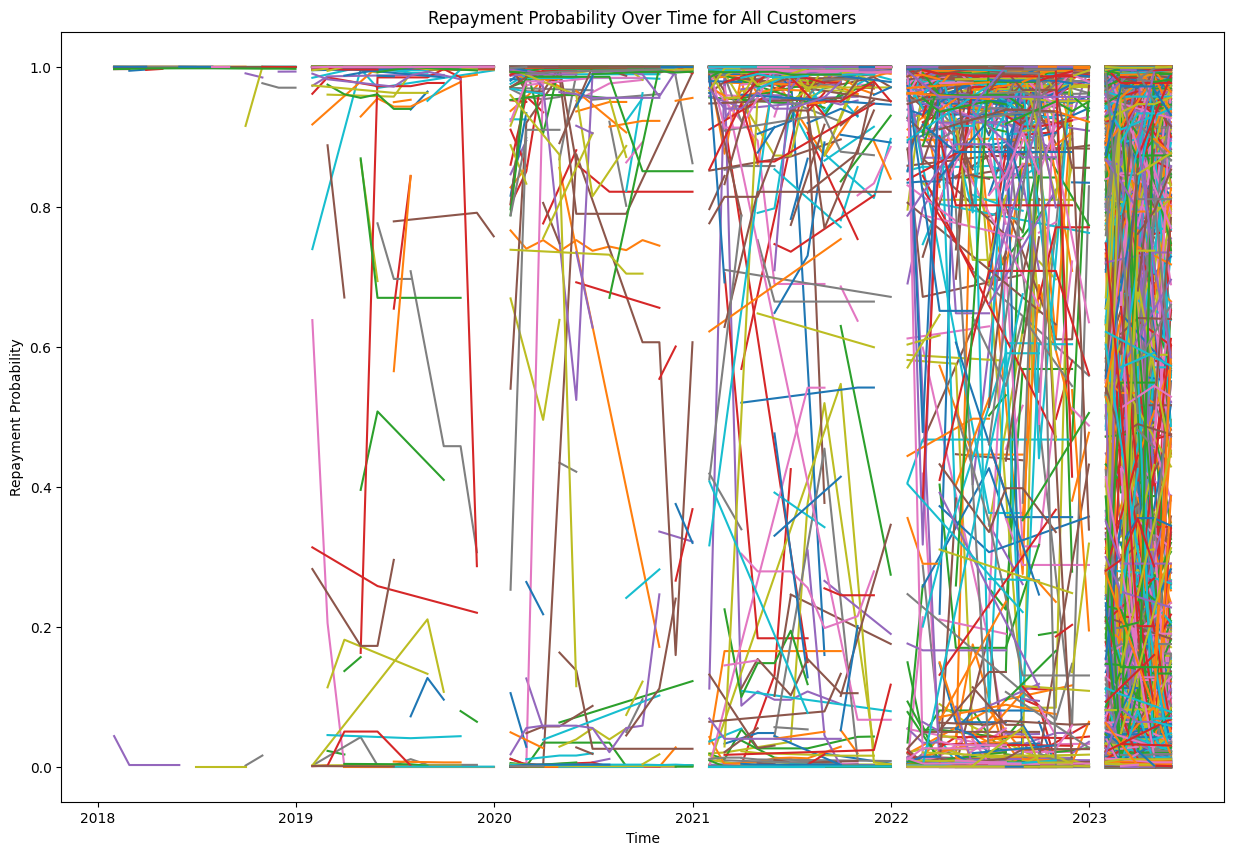

In [264]:
plt.figure(figsize=(15,10))

# Get a list of unique customer IDs
customer_ids = df_reduced['Customer_ID'].unique()

# Plot each customer's repayment probability over time
for customer_id in customer_ids:
    customer_data = df_reduced[df_reduced['Customer_ID'] == customer_id]
    plt.plot_date(customer_data['CALL_MON_YEAR'], customer_data['repay_prob'], linestyle='solid', marker=None)

plt.title('Repayment Probability Over Time for All Customers')
plt.xlabel('Time')
plt.ylabel('Repayment Probability')
plt.show()

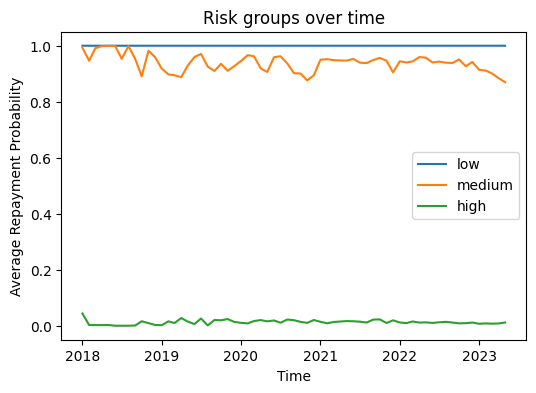

In [271]:
# Define risk thresholds
low_risk_threshold = df_reduced['repay_prob'].quantile(0.75)
high_risk_threshold = df_reduced['repay_prob'].quantile(0.25)

# Create a new column for risk group
df_reduced['risk_group'] = 'medium'  # default to 'medium'
df_reduced.loc[df_reduced['repay_prob'] > low_risk_threshold, 'risk_group'] = 'low'
df_reduced.loc[df_reduced['repay_prob'] < high_risk_threshold, 'risk_group'] = 'high'

import matplotlib.pyplot as plt
import seaborn as sns


# plot
plt.figure(figsize=(6, 4))

# For each risk group, we'll plot a line
for risk_group in ['low', 'medium', 'high']:
    subset = df_reduced[df_reduced['risk_group'] == risk_group]
    subset_grouped = subset.groupby('CALL_MON_YEAR')['repay_prob'].mean()
    sns.lineplot(data=subset_grouped, label=risk_group)

plt.xlabel('Time')
plt.ylabel('Average Repayment Probability')
plt.title('Risk groups over time')
plt.legend()
plt.show()


In [272]:
df_reduced['risk_group'].value_counts()

medium    16548
high       8272
low        8266
Name: risk_group, dtype: int64

In [3]:
df_train

NameError: name 'df_train' is not defined